# 大语言模型导论

## What is Language AI?

AI：人工智能是制造智能机器，特别是智能计算机程序的科学与工程学。它与使用计算机来理解人类智能的类似任务相关，但人工智能不必局限于生物学上可观察的方法。
                                       ——John McCarthy,2007

Language AI：语言人工智能是指人工智能的一个子领域，专注于开发能够理解、处理和生成人类语言的技术。随着机器学习方法在解决语言处理问题上的持续成功，“语言人工智能”这一术语经常可以与自然语言处理（NLP）互换使用。

## Language AI的近代史

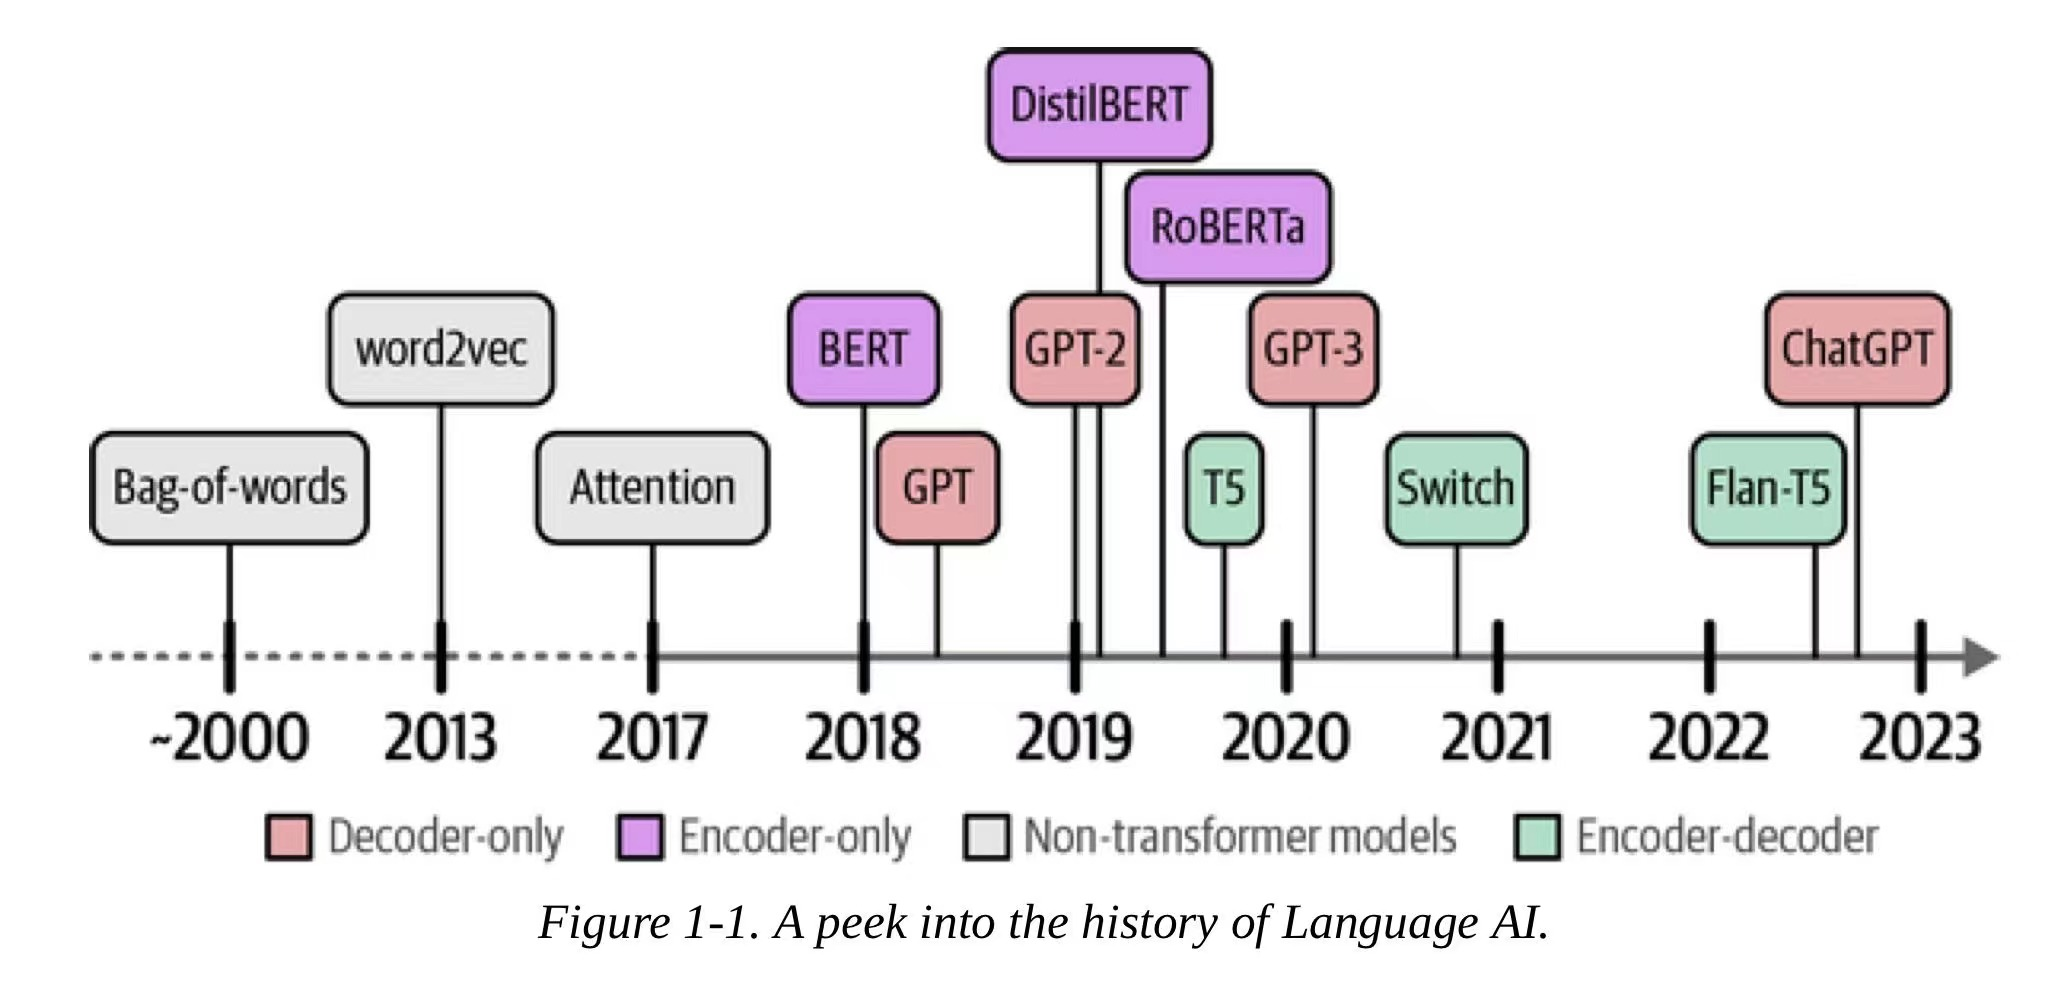

文本本质上是非结构化的，当用二进制（即单个字符）表示时，会失去其意义。因此，在语言人工智能的发展历史上，人们一直高度重视以结构化的方式表示语言，以便计算机能够更容易地使用它。

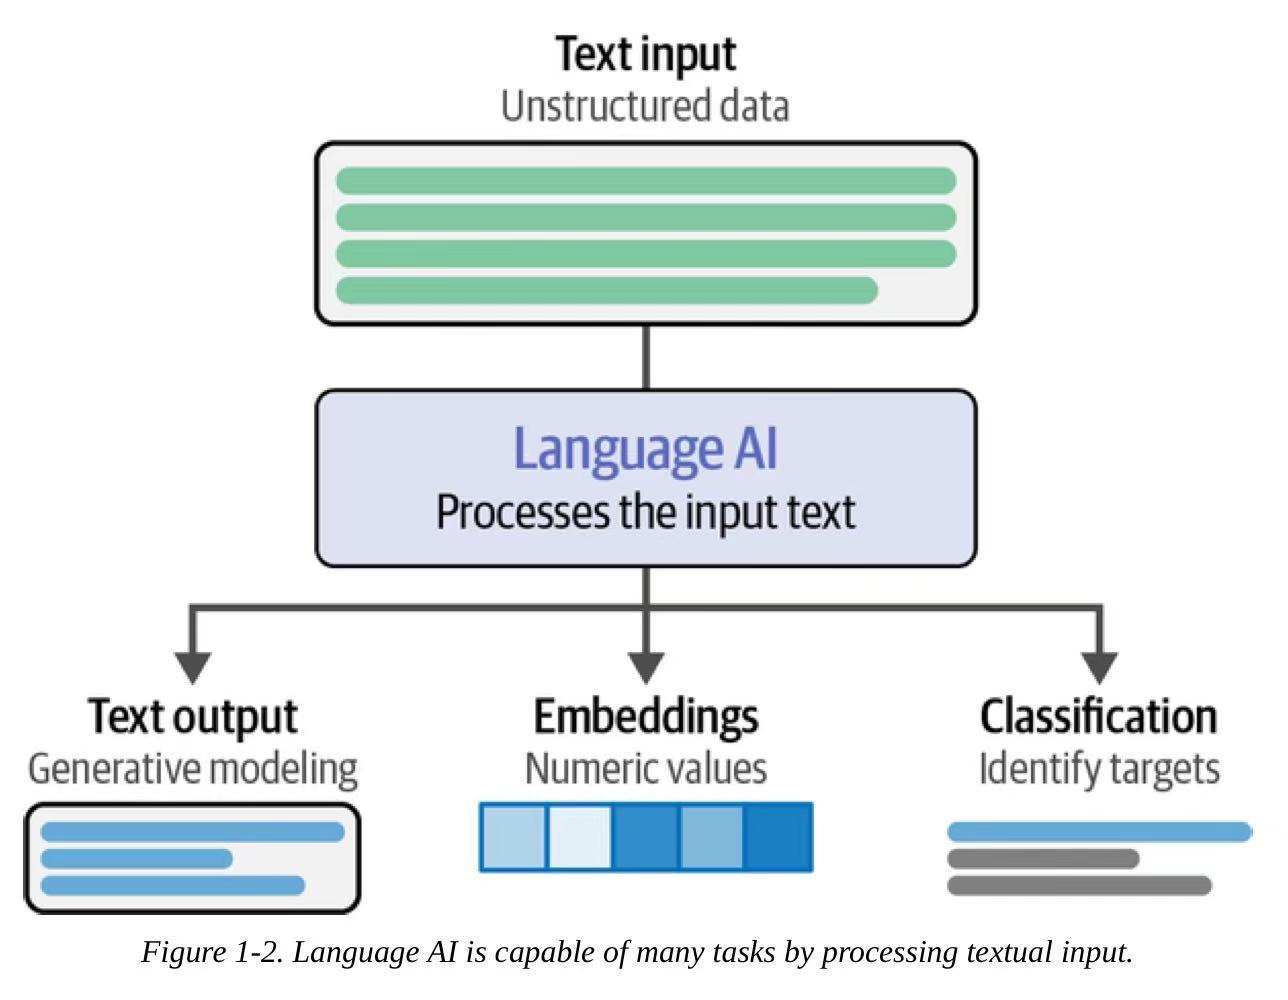

### 将语言表示为“词袋模型”（Bag-of-Words）

词袋模型的第一步是分词，即将句子分解成单个单词或子单词（标记）的过程。

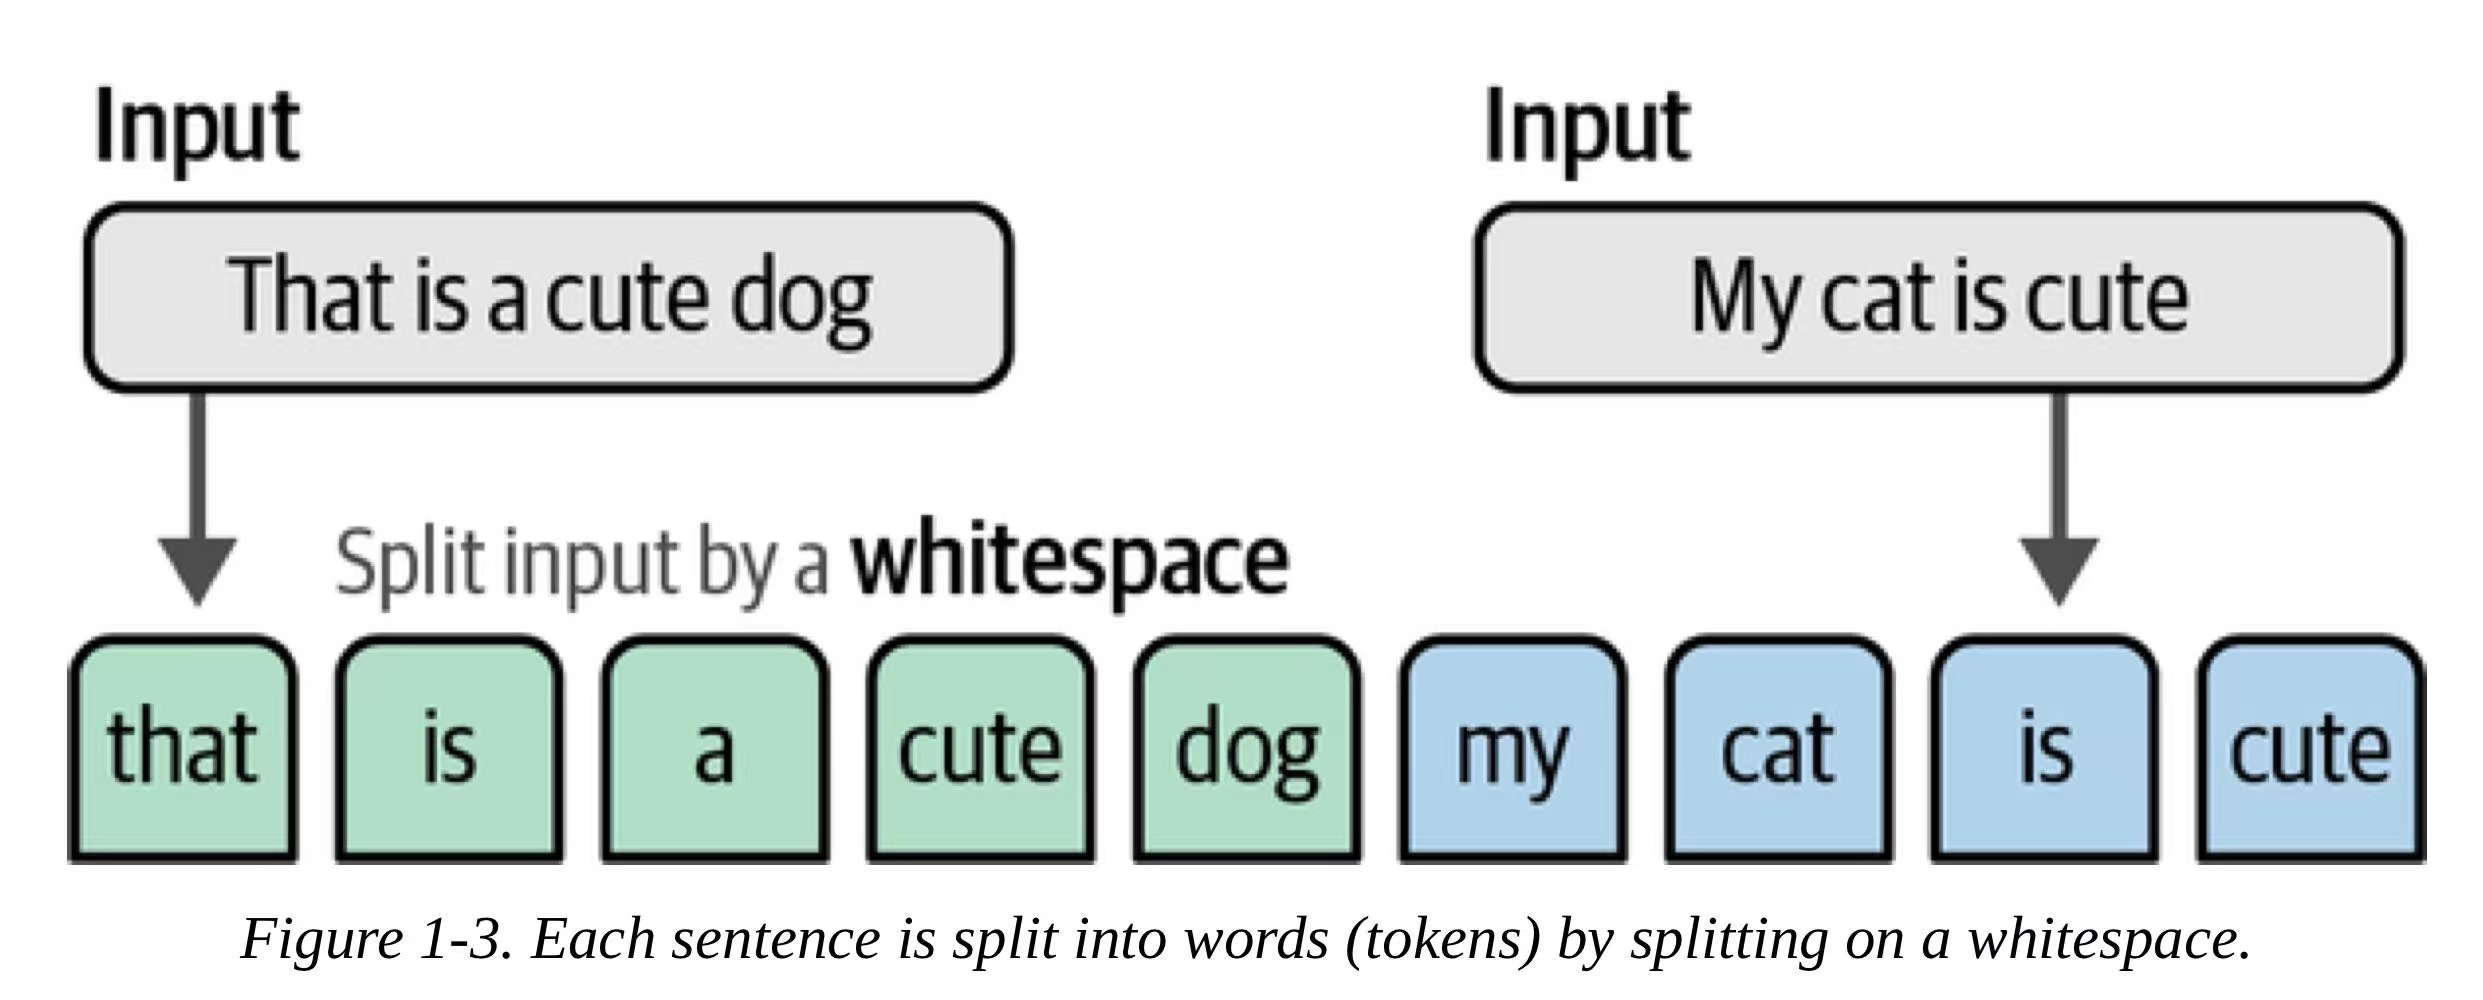

分词之后，我们将每个句子中的所有唯一单词组合起来，创建一个词汇表，用于表示这些句子。

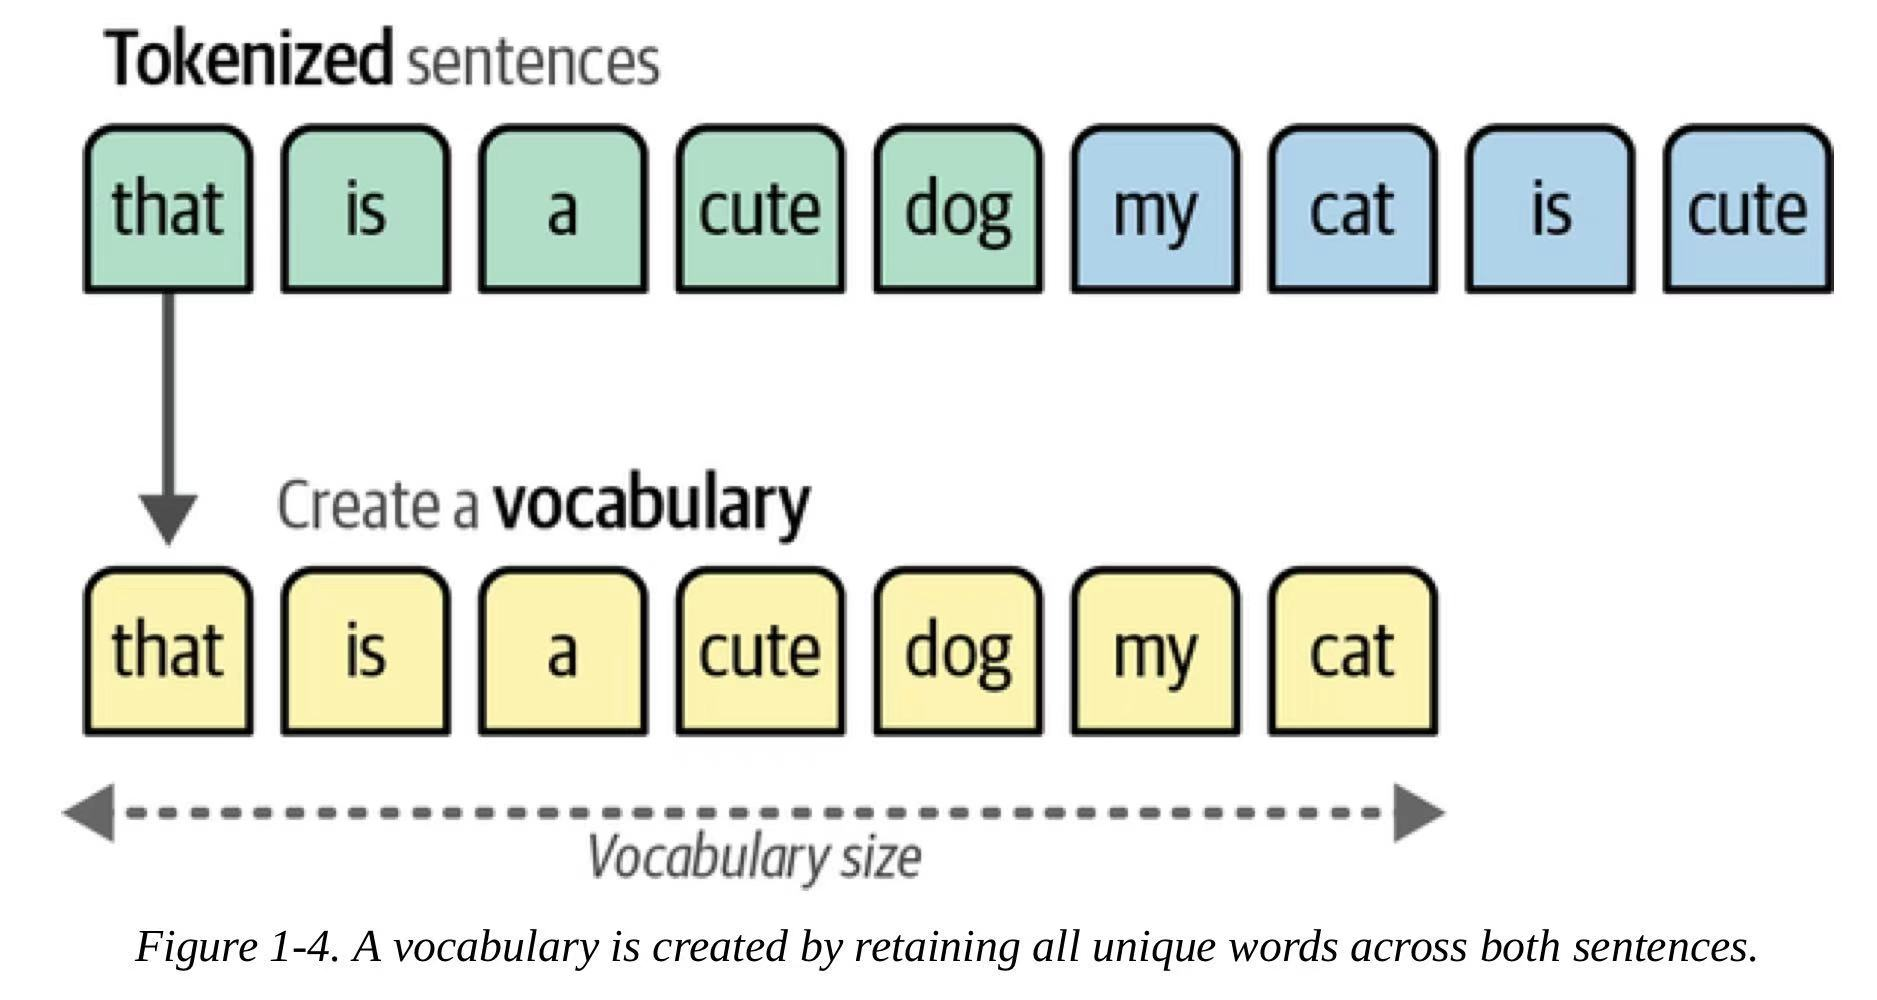

利用我们的词汇表，我们只需简单统计每个句子中每个单词出现的次数，从而直观地创建出一个词袋（Bag-of-Words）。因此，词袋模型旨在以数字的形式（也称为向量或向量表示）来呈现文本。在本书中，我们将这类模型称为表示模型。

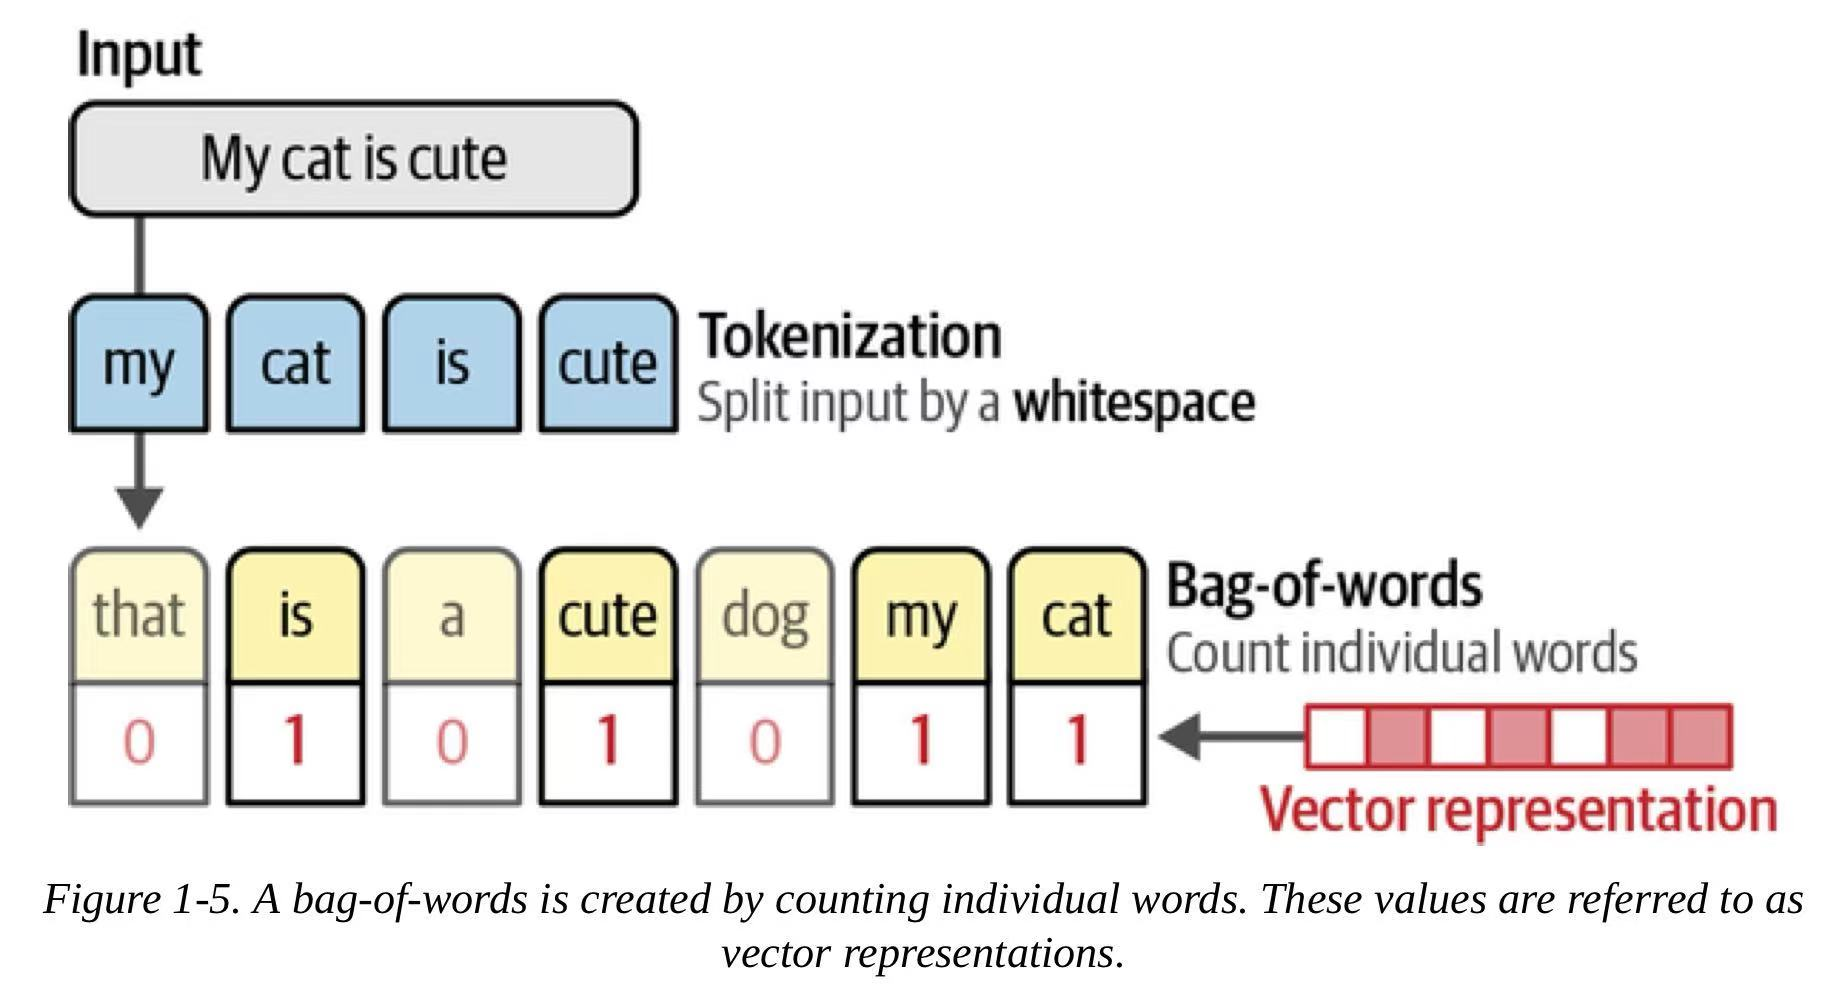

### 使用密集向量嵌入（Dense Vector Embeddings）获得更好的表示

word2vec于2013年发布，是首批成功尝试在嵌入（嵌入是数据的向量表示，旨在捕捉其意义）中捕捉文本意义的工具之一。

word2vec通过对大量文本数据（如整个维基百科）进行训练，来学习单词的语义表示。为了生成这些语义表示，word2vec利用了神经网络。这些网络由相互连接的节点层组成，用于处理信息。神经网络可以有多层，其中每个连接根据输入具有一定的权重。这些权重通常被称为模型的参数。

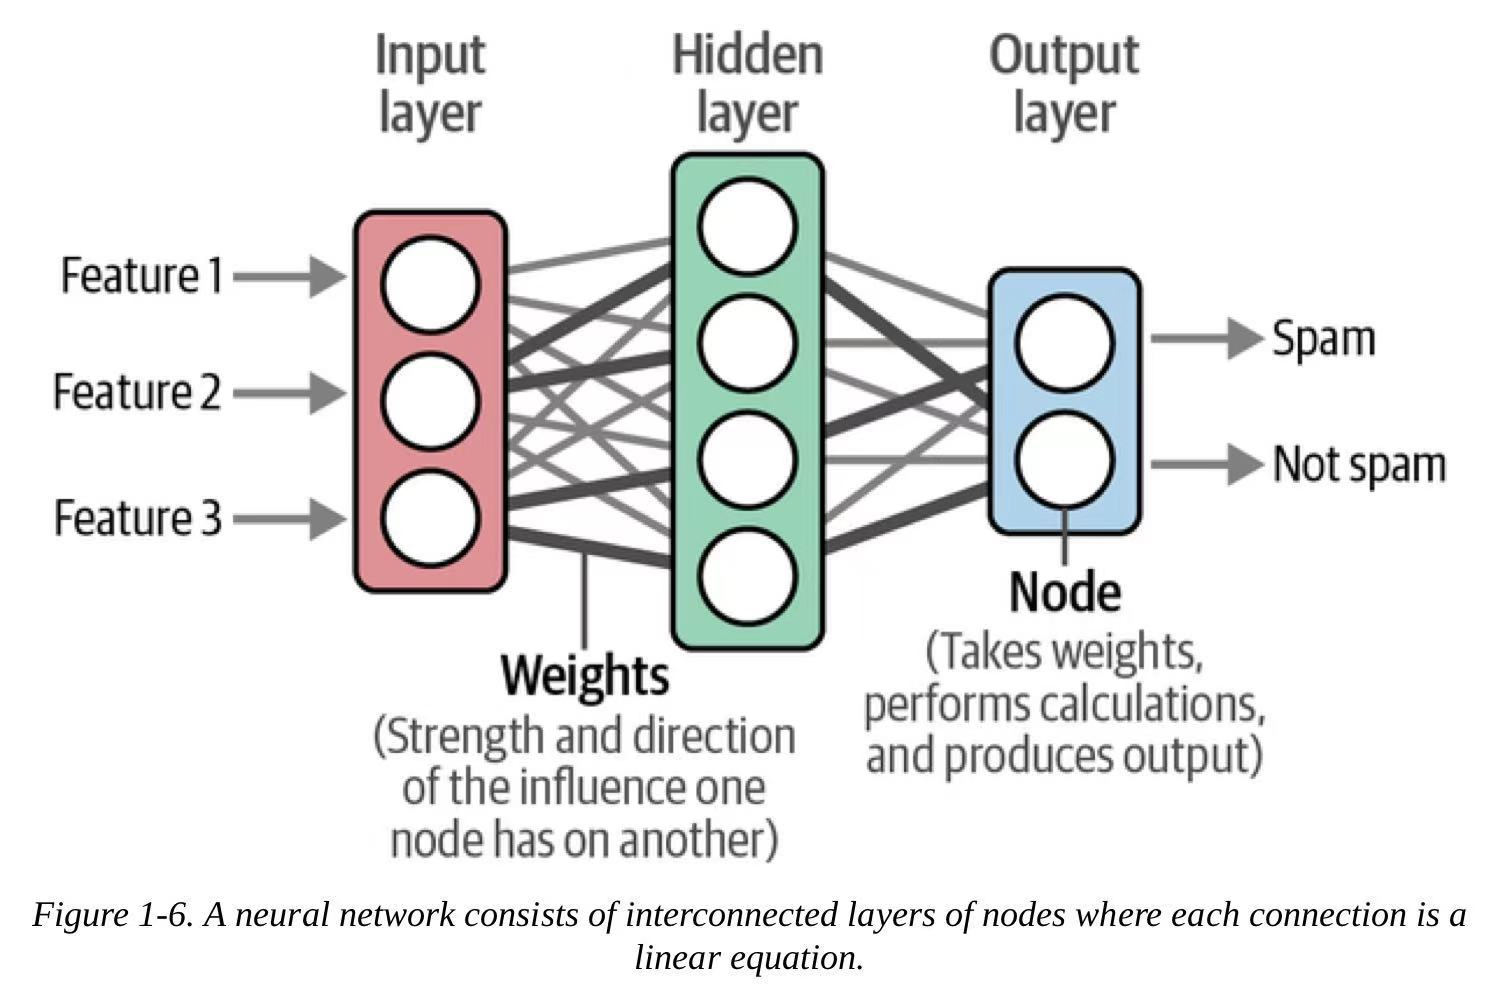

利用这些神经网络，word2vec通过查看在给定的句子中哪些其他单词倾向于出现在它们的旁边来生成单词嵌入。我们首先为我们的词汇表中的每个单词分配一个向量嵌入，例如每个单词有50个值，这些值用随机值初始化。然后，在每一步的训练中，我们从训练数据中获取单词对，模型尝试预测它们是否可能在句子中成为相邻单词。在这个训练过程中，word2vec学习单词之间的关系，并将这些信息提炼成嵌入。如果两个单词倾向于有相同的相邻单词，它们的嵌入就会彼此更接近，反之亦然。

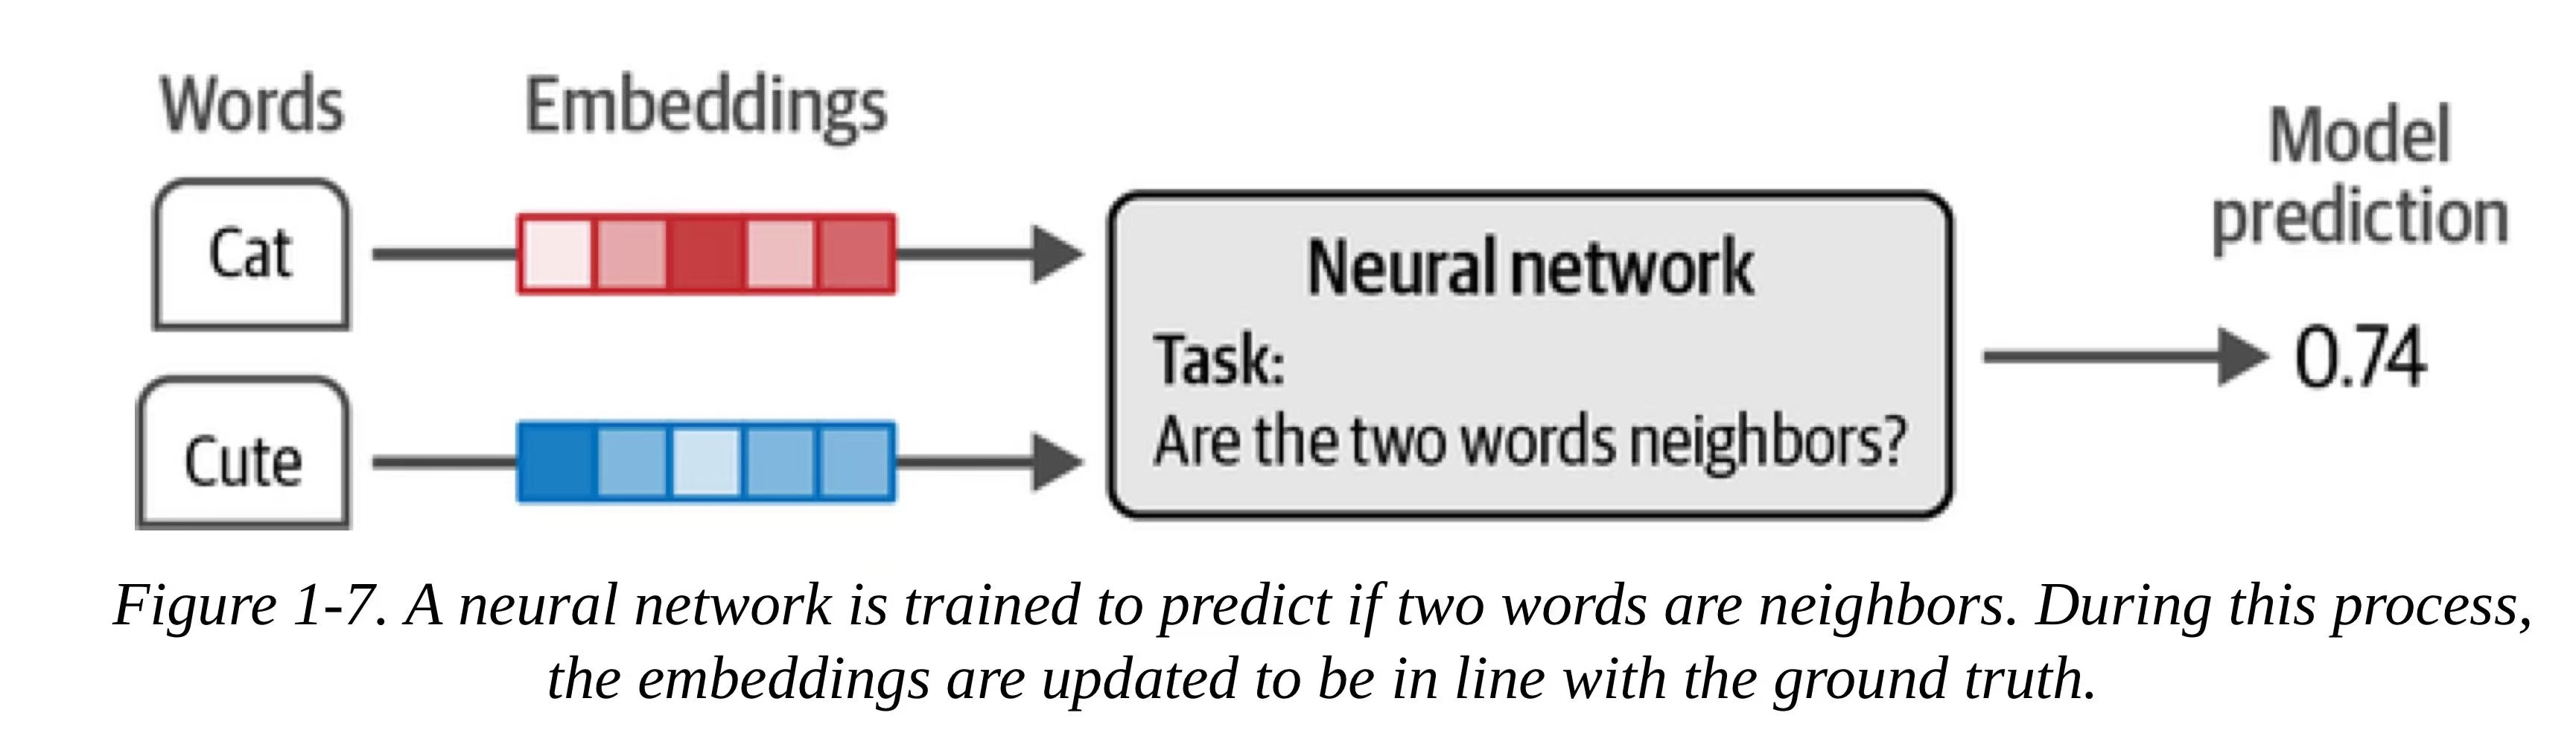

所得到的嵌入能够捕捉单词的意义，但这到底是什么意思呢？

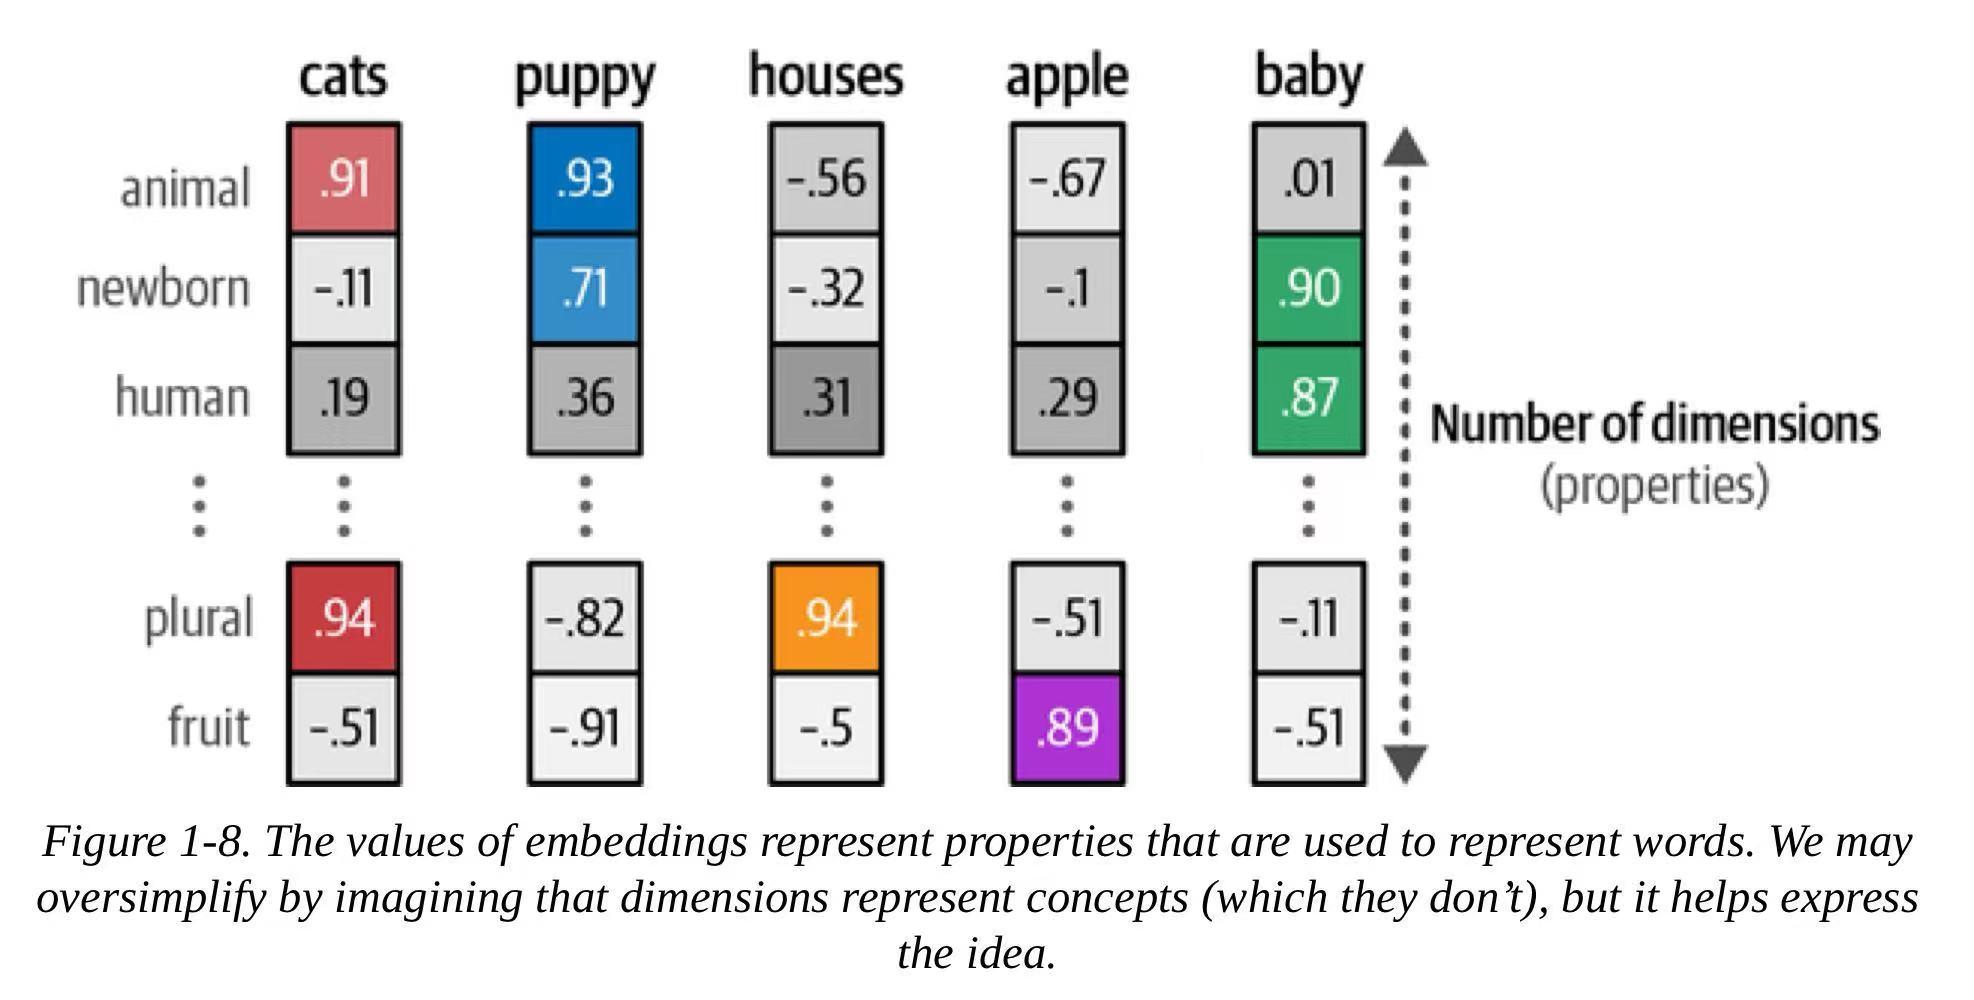

嵌入可以有多种属性来表示单词的意义。由于嵌入的大小是固定的，因此选择其属性来创建单词的心理表征。

嵌入非常有用，因为它们使我们能够衡量两个单词之间的语义相似性。通过使用各种距离度量方法，我们可以判断一个单词与另一个单词的接近程度。

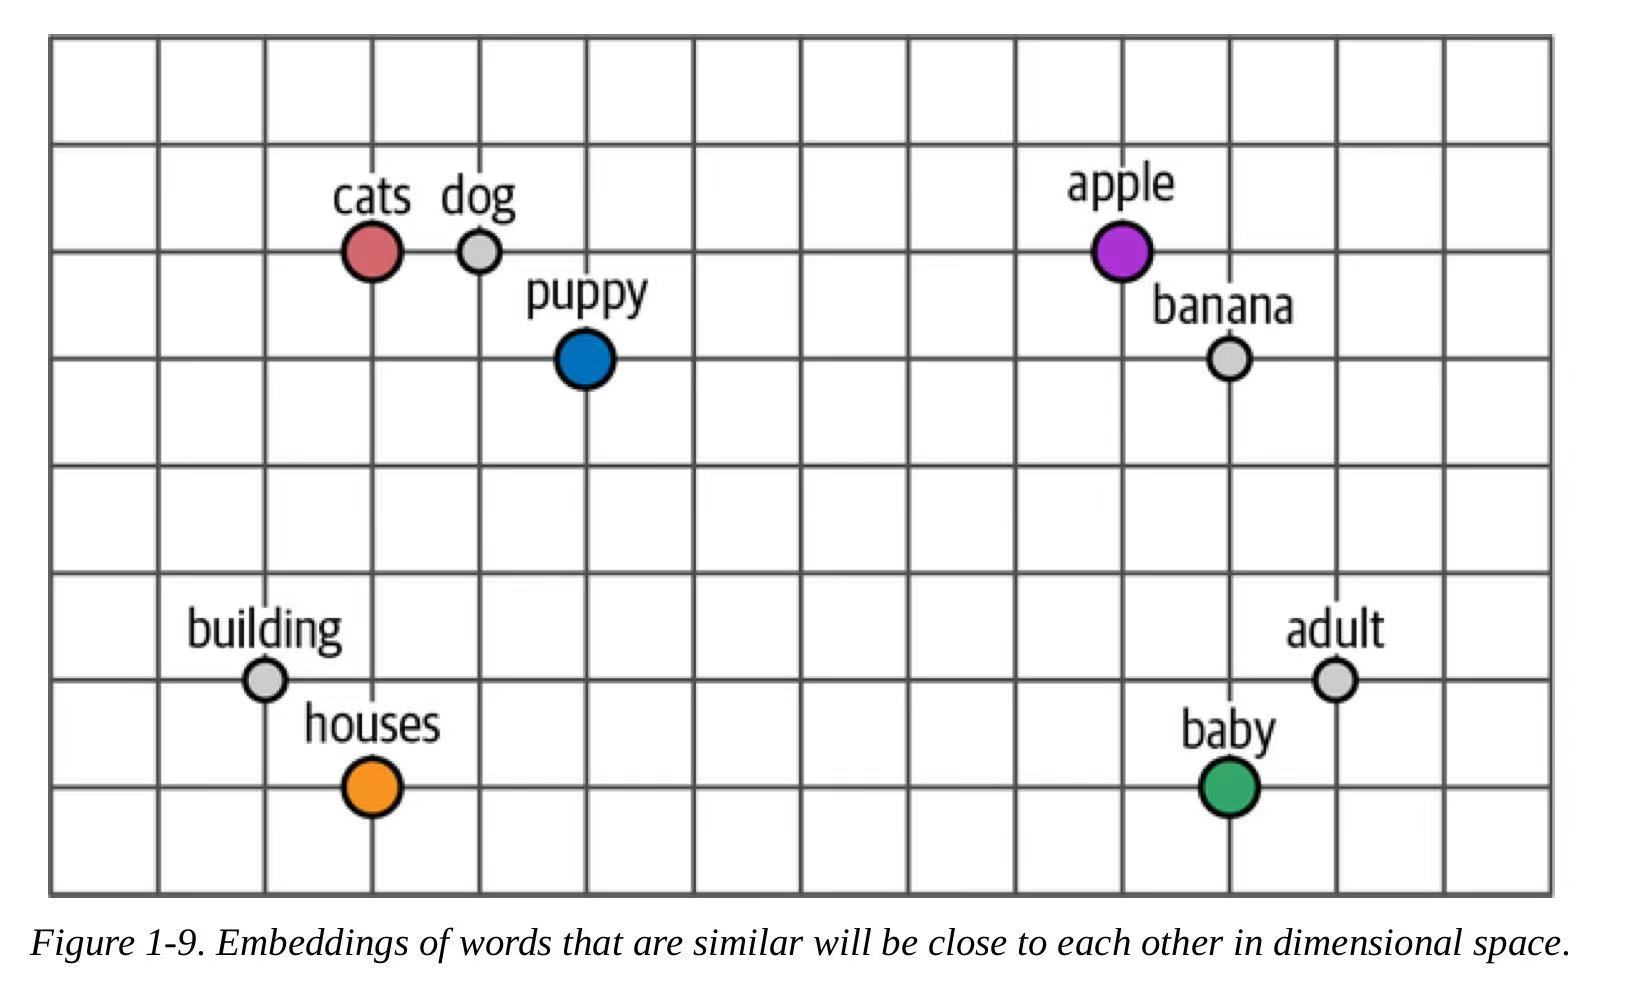

### 嵌入的类型

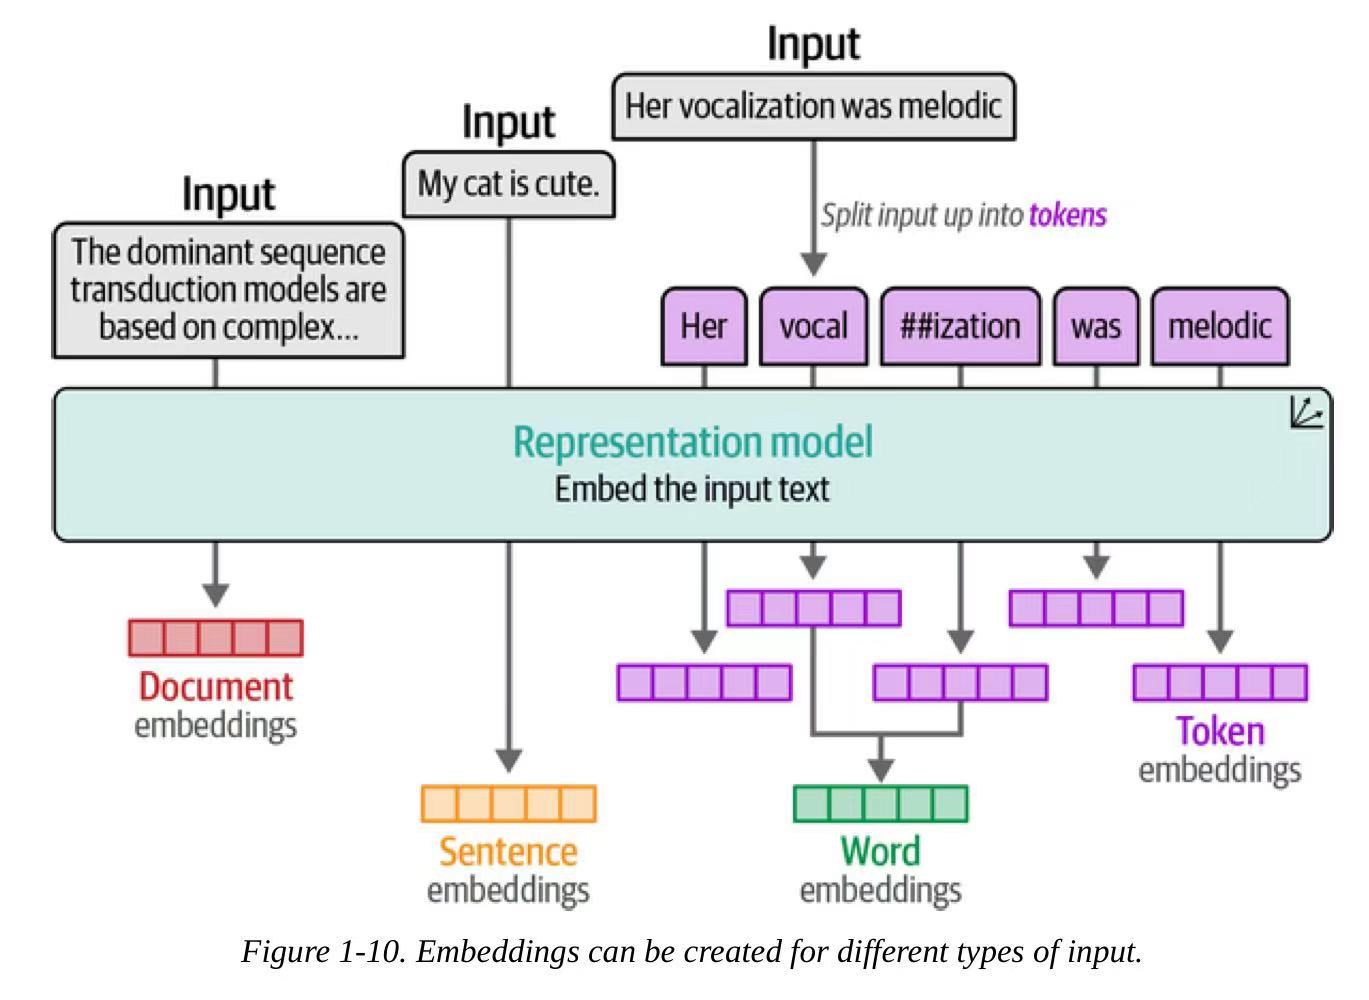

### 使用注意力机制编码和解码上下文

word2vec的训练过程创建了静态的、可下载的词表示。但是一个词的含义，以及因此产生的嵌入，应该根据上下文而改变。

编码这段文本的一个步骤是通过循环神经网络（RNNs）实现的。循环神经网络是神经网络的一种变体，可以将序列作为额外的输入进行建模。为了实现这一点，这些循环神经网络（RNNs）被用于两个任务：编码或表示输入句子，以及解码或生成输出句子。

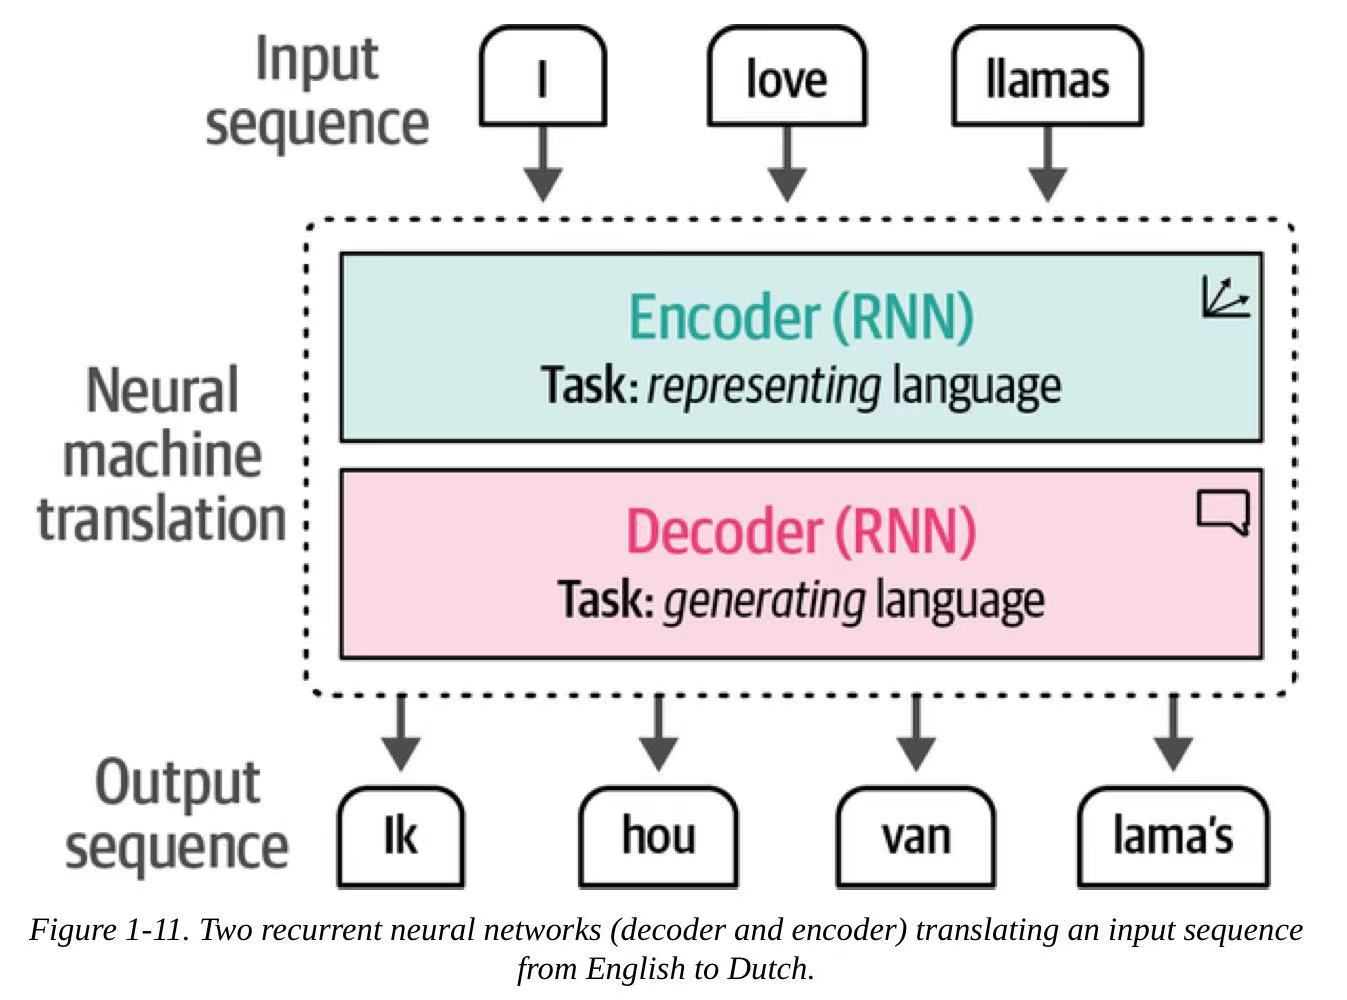

该架构中的每一步都是自回归的。在生成下一个词时，该架构需要消耗掉所有之前生成的词。

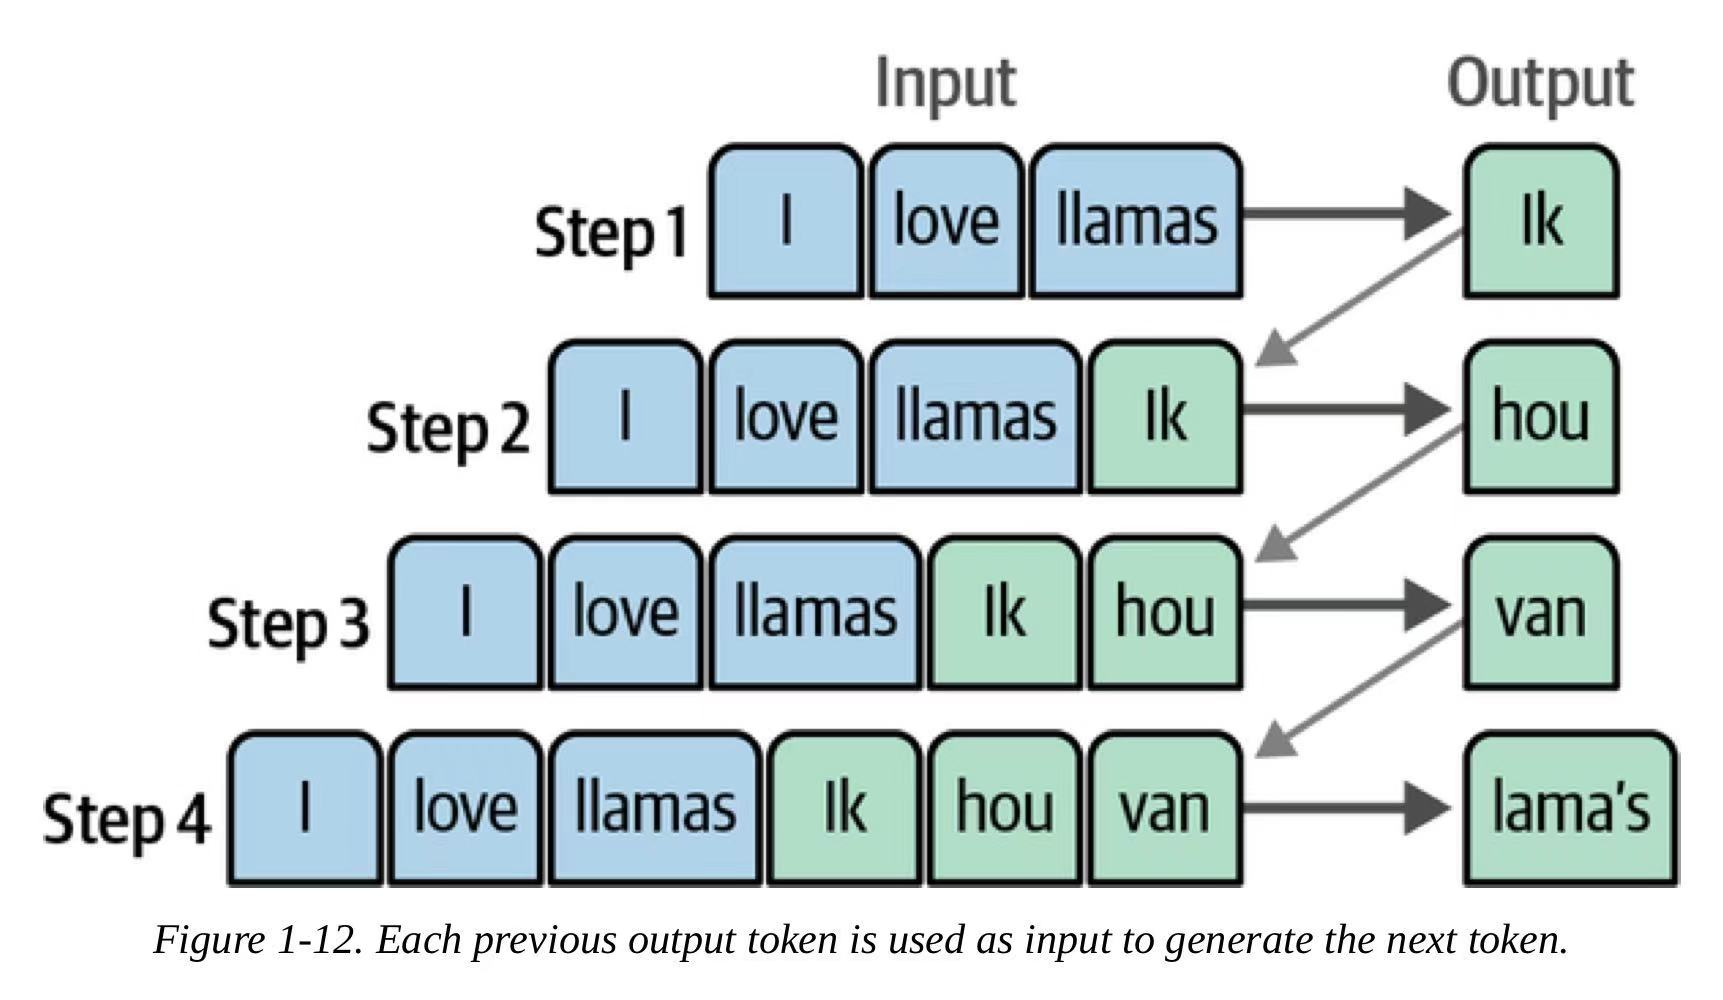

编码步骤旨在尽可能好地表示输入，生成以嵌入形式存在的上下文，该上下文作为解码器的输入。为了生成这种表示，它采用单词的嵌入作为输入，这意味着我们可以使用word2vec来生成初始表示。

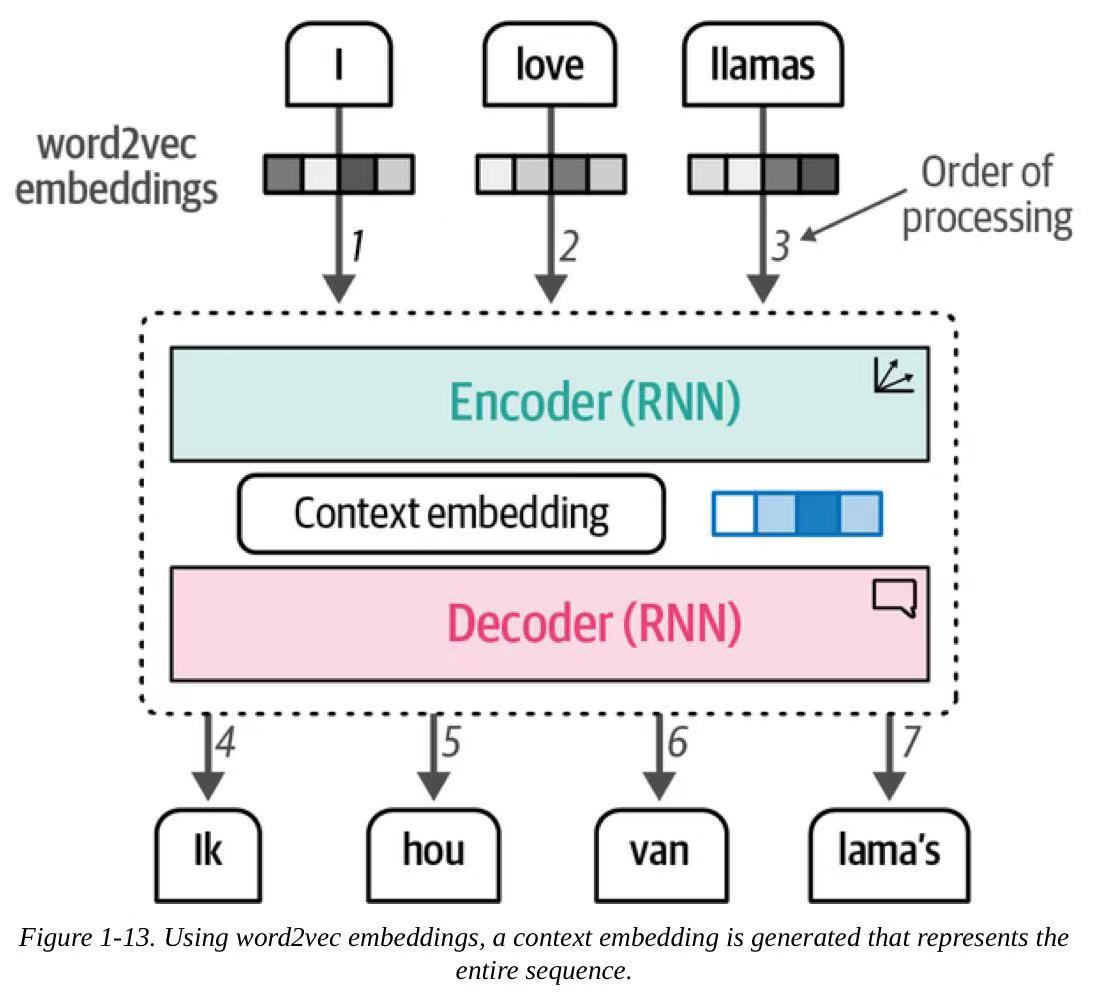

然而，这种上下文嵌入在处理较长句子时变得困难，因为它仅仅是用一个单一的嵌入代表整个输入。2014年，引入了一种名为“注意力机制”（attention）的解决方案，该机制极大地改进了原有的架构。

注意力机制允许模型关注输入序列中彼此相关的部分（即“关注”彼此），并放大它们的信号。注意力机制能够有选择地确定给定句子中哪些单词最为重要。

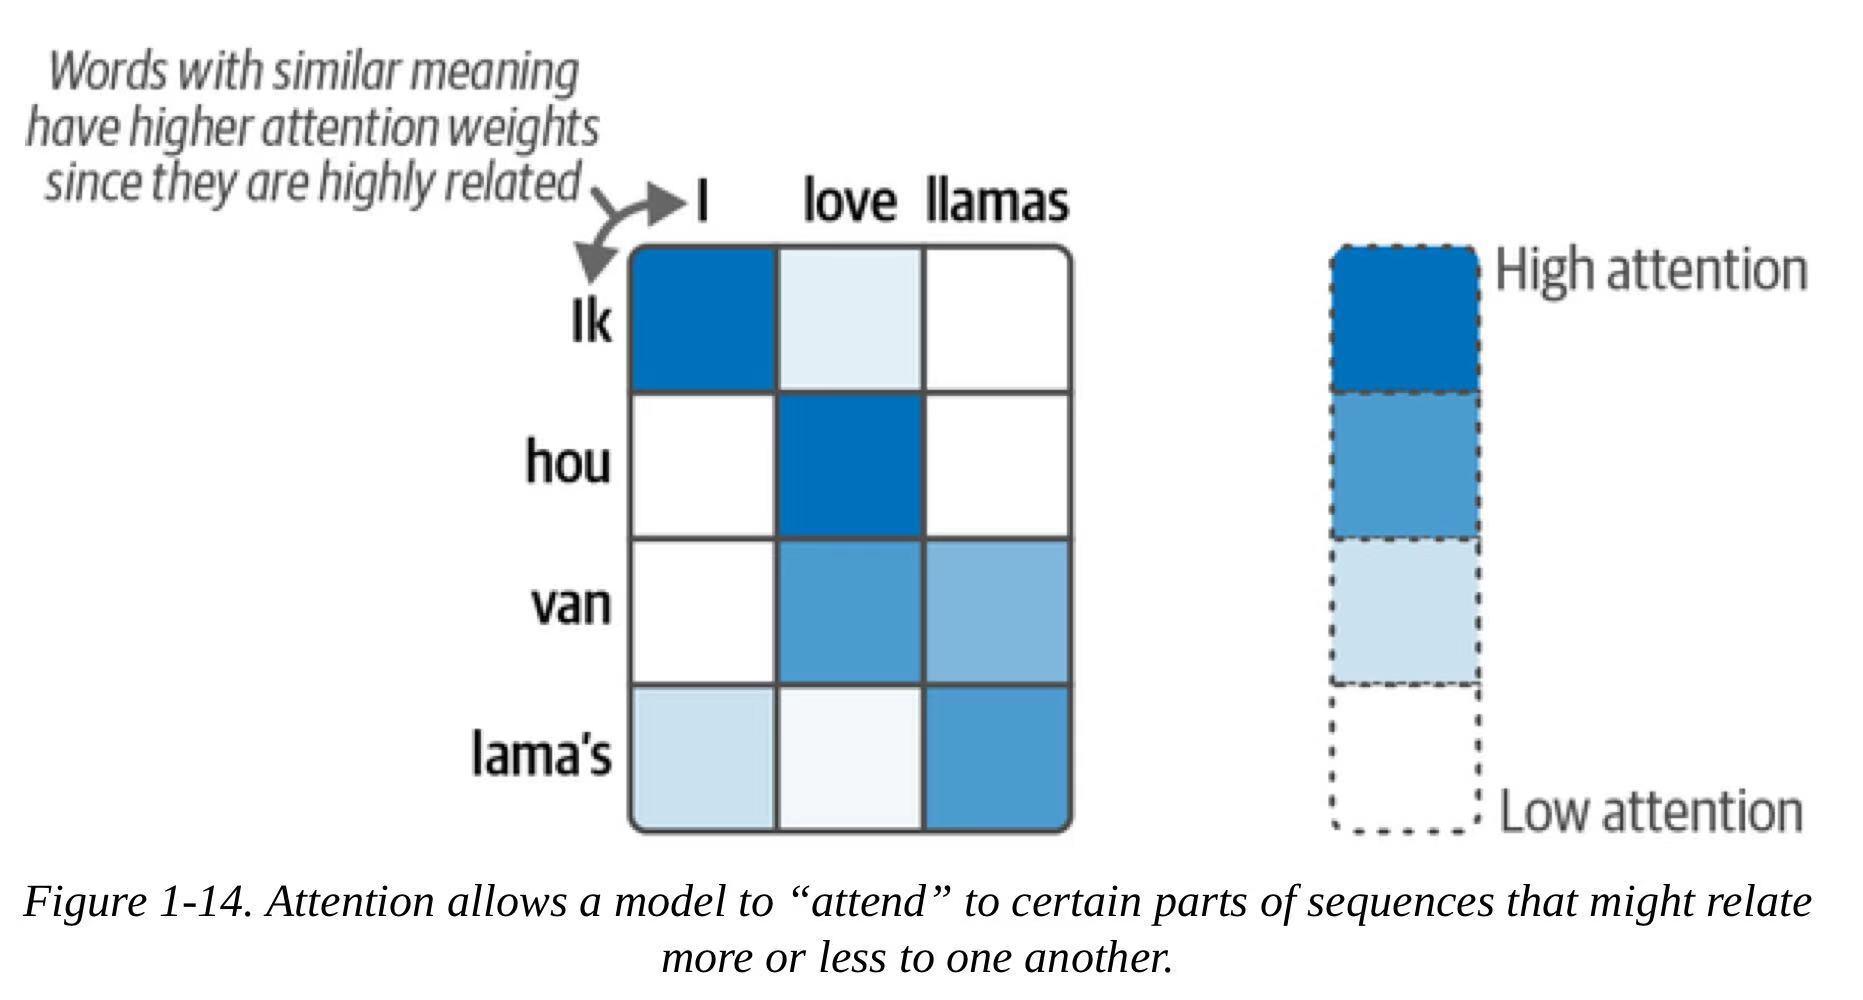

通过在解码器步骤中添加这些注意力机制，循环神经网络（RNN）可以为序列中每个与潜在输出相关的输入词生成信号。不是仅将上下文嵌入传递给解码器，而是将所有输入词的隐藏状态都传递过去。

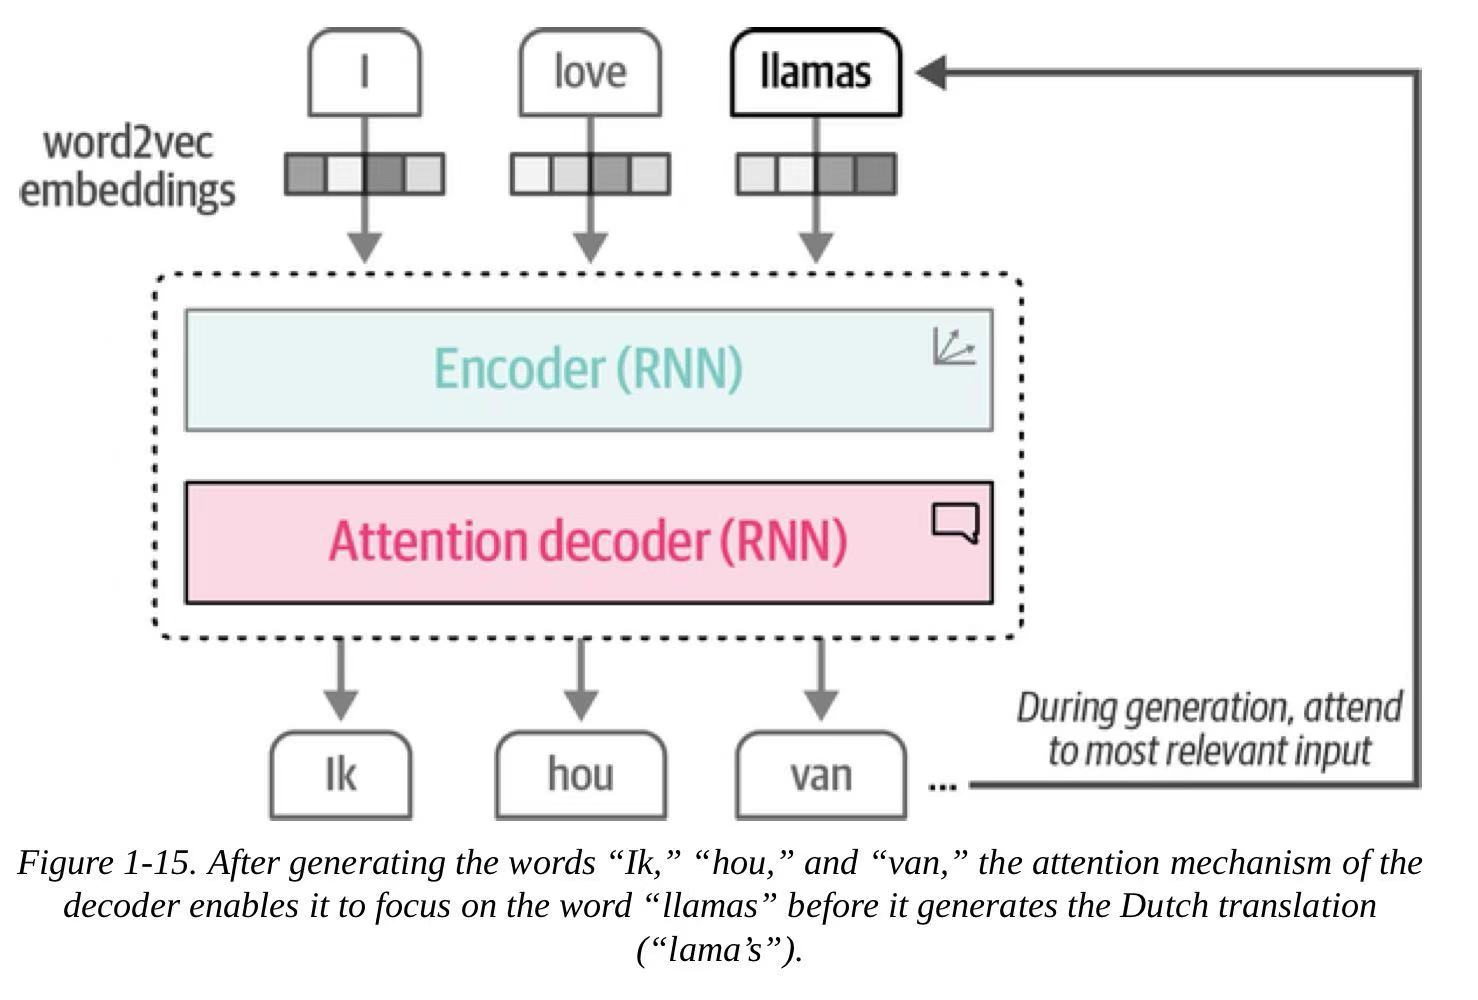

与word2vec相比，这种架构通过“关注”整个句子，能够表示文本的序列性质以及它出现的上下文。然而，这种序列性质排除了模型训练过程中的并行化。

### Attention Is All You Need

注意力机制的真正威力，以及推动大型语言模型惊人能力的原因，首先在2017年发布的著名论文《Attention is All You Need》中得到了探讨。作者提出了一种名为Transformer的网络架构，该架构完全基于注意力机制，并去除了我们之前看到的循环网络。与循环网络相比，Transformer可以进行并行训练，从而极大地加快了训练速度。

在Transformer中，编码器和解码器组件是堆叠在一起的。这种架构仍然是自回归的，需要在生成一个新词之前先消耗掉每个已生成的词。

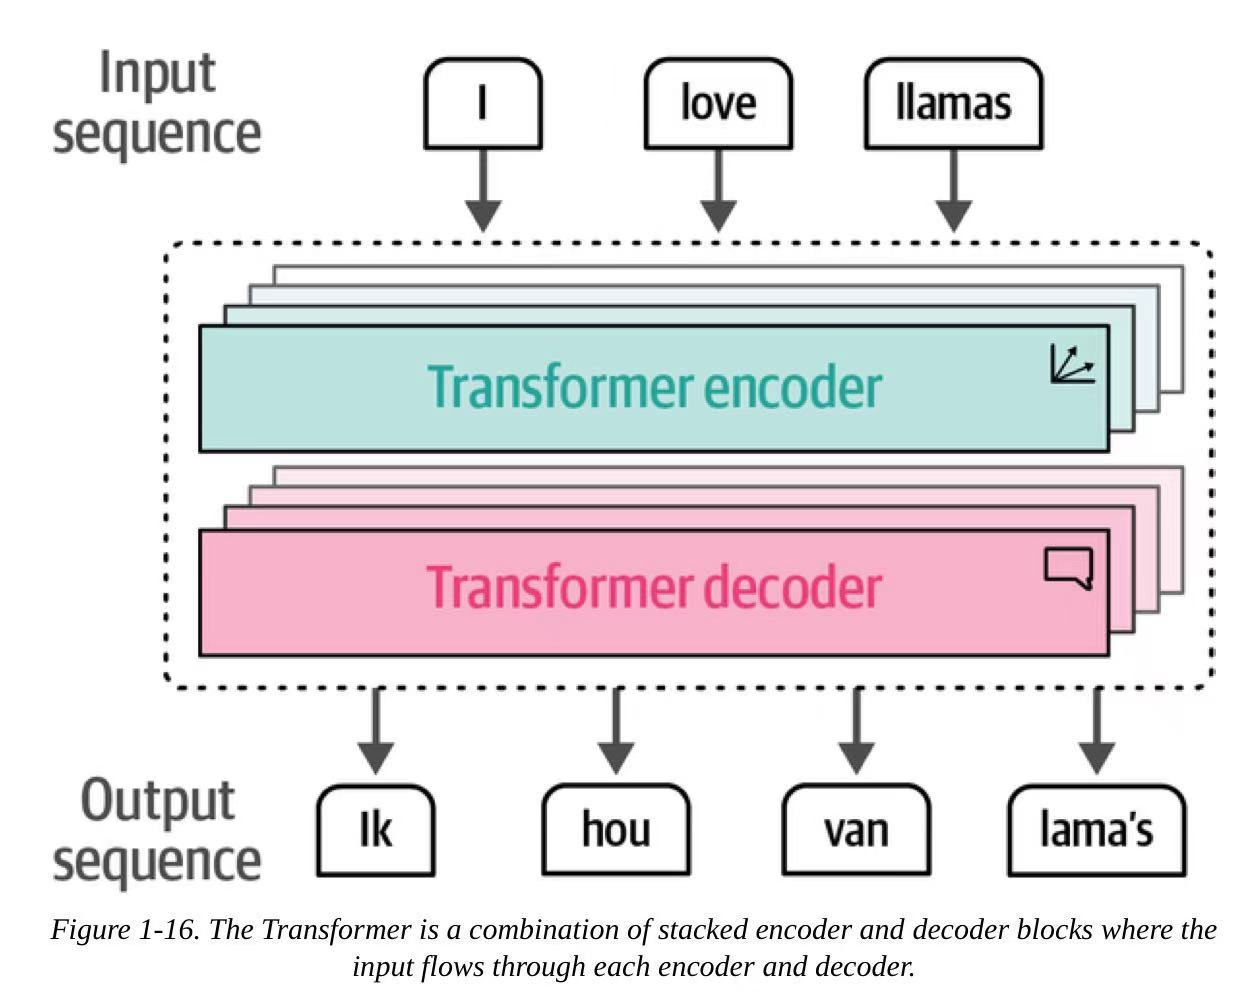

现在，编码器和解码器模块都将围绕注意力机制进行工作，而不是利用具有注意力特征的循环神经网络（RNN）。

Transformer中的编码器模块由两部分组成：自注意力机制和前馈神经网络。

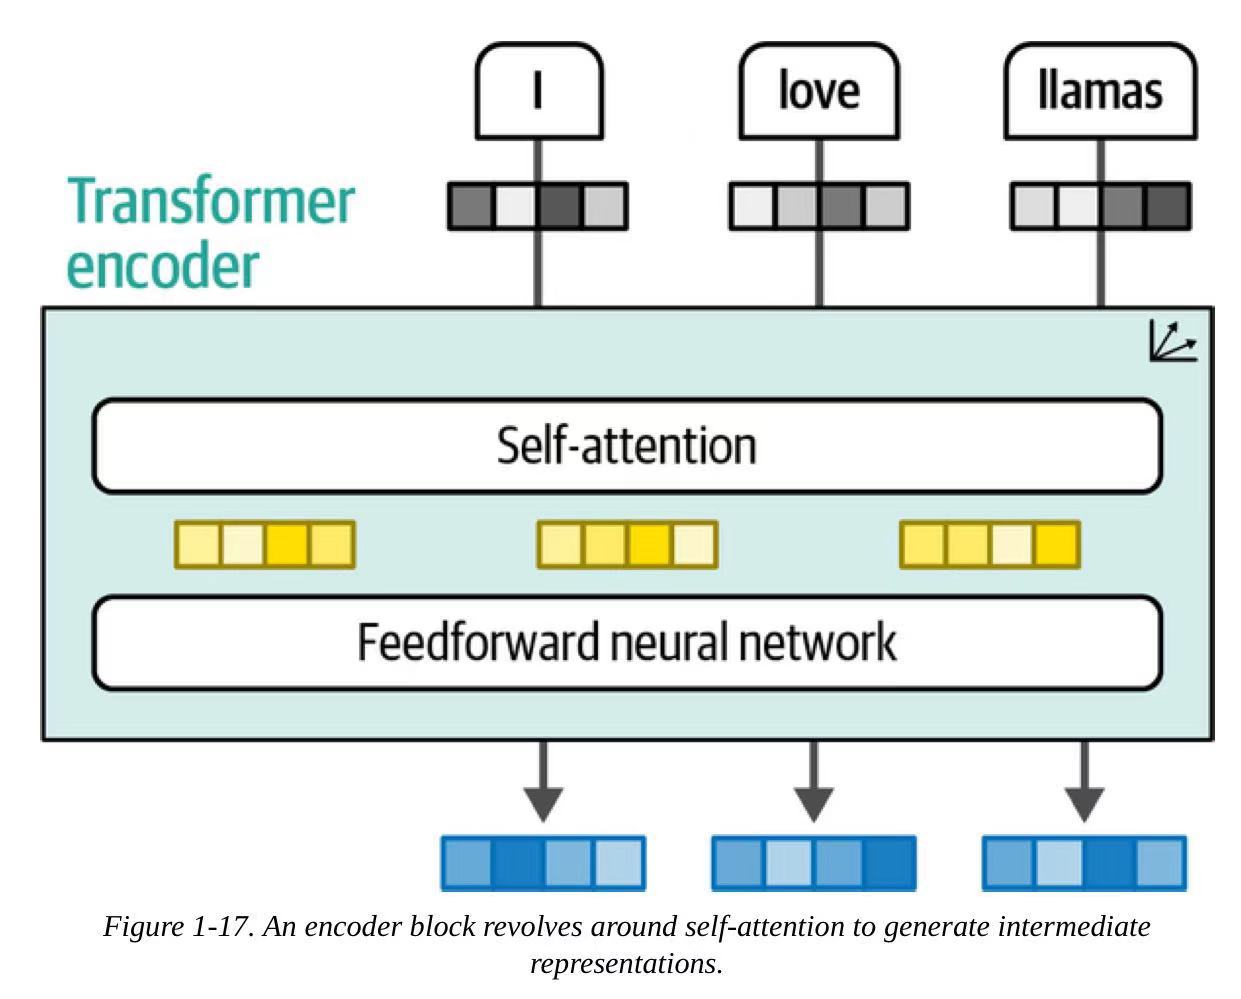

与之前的注意力方法相比，自注意力机制可以关注单个序列内的不同位置，从而更轻松、更准确地表示输入序列。它不必一次处理一个标记，而是可以用来一次性查看整个序列。

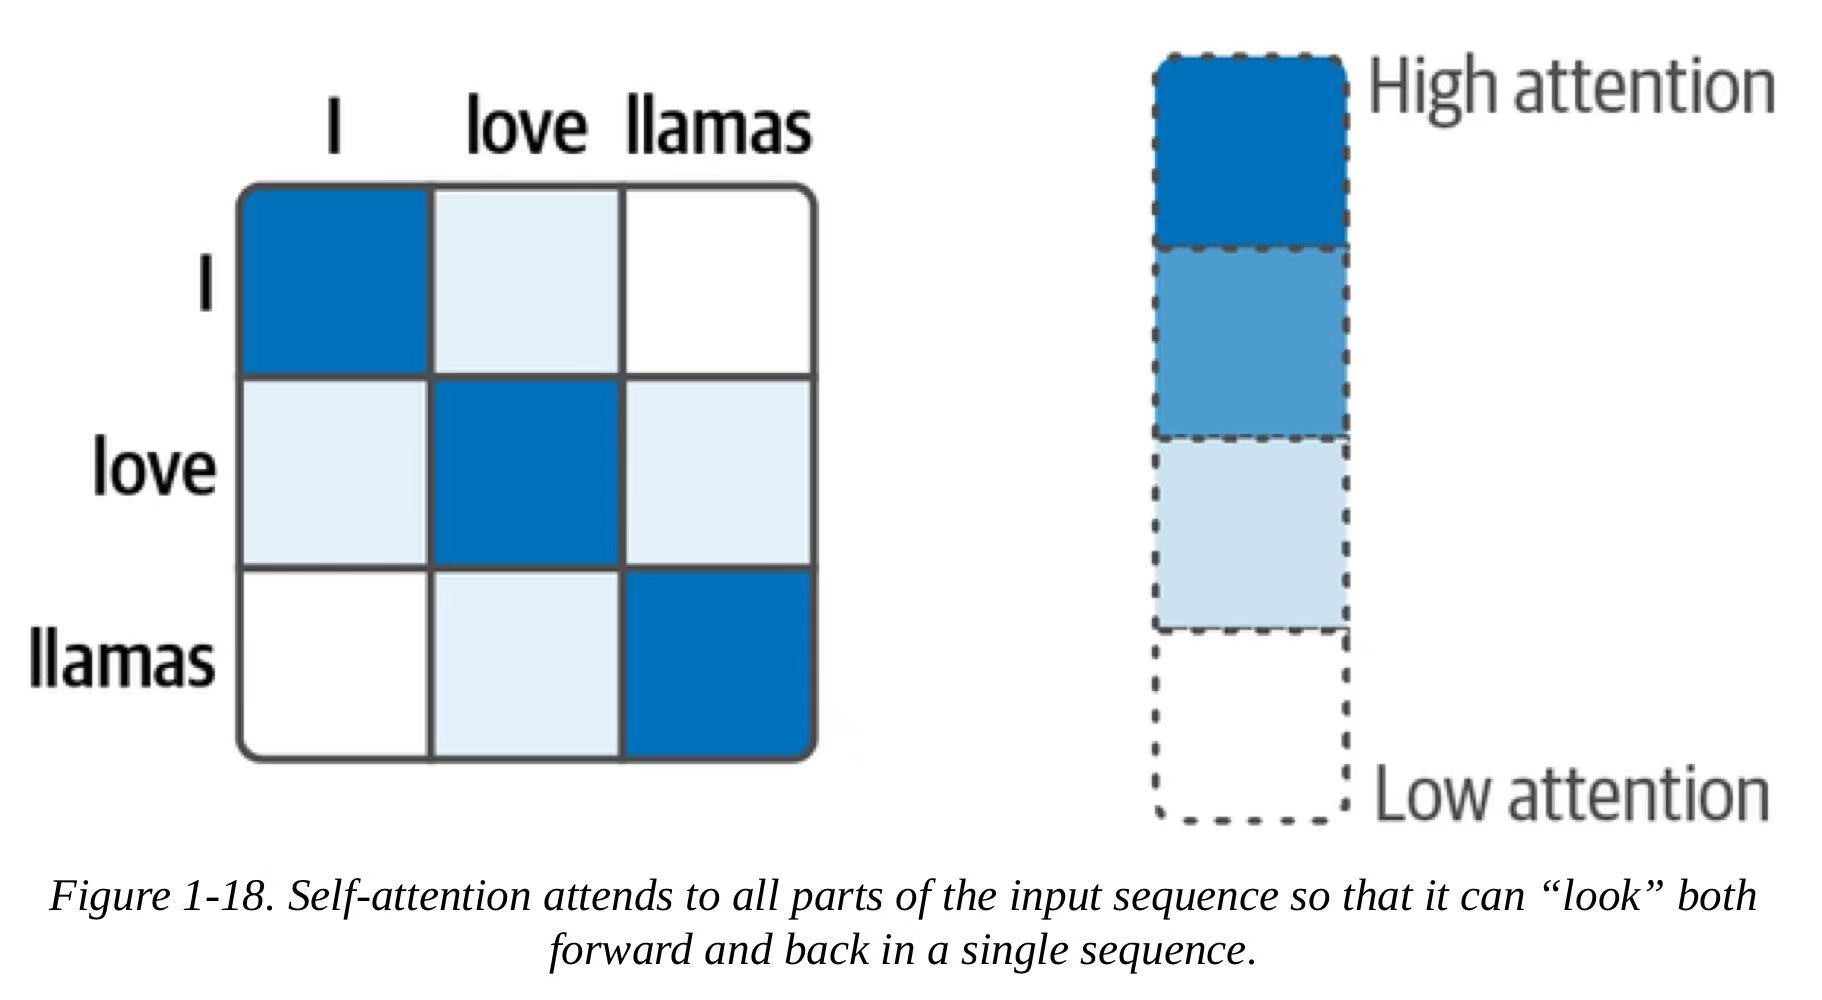

与编码器相比，解码器有一个额外的层，该层关注编码器的输出（以找到输入的相关部分）。

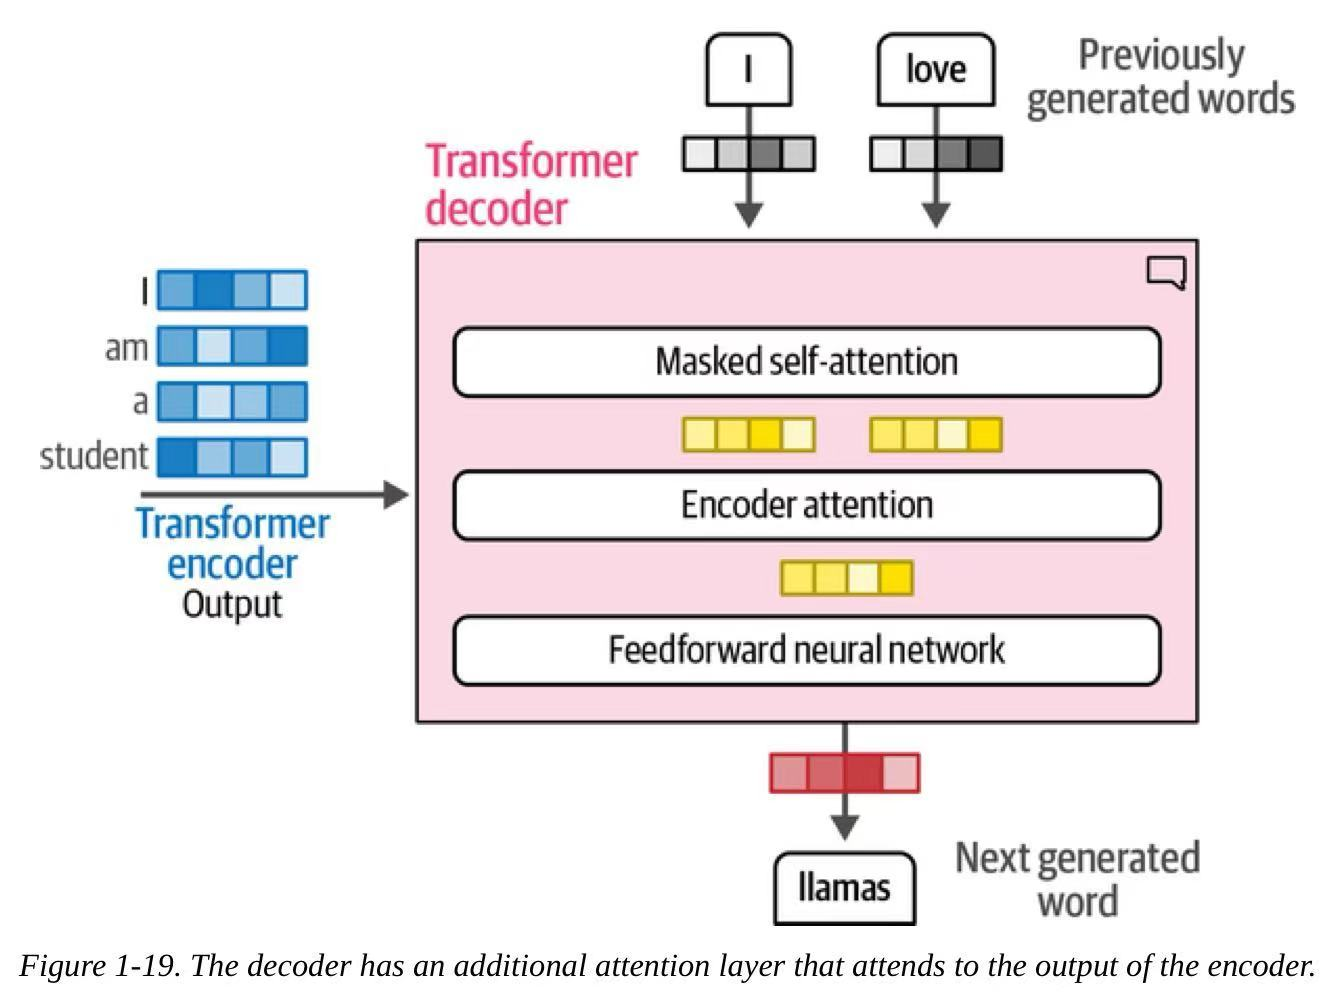

解码器中的自注意力层会对未来的位置进行屏蔽，因此它只关注之前的位置，以防止在生成输出时泄露信息。（！！！没太看懂）

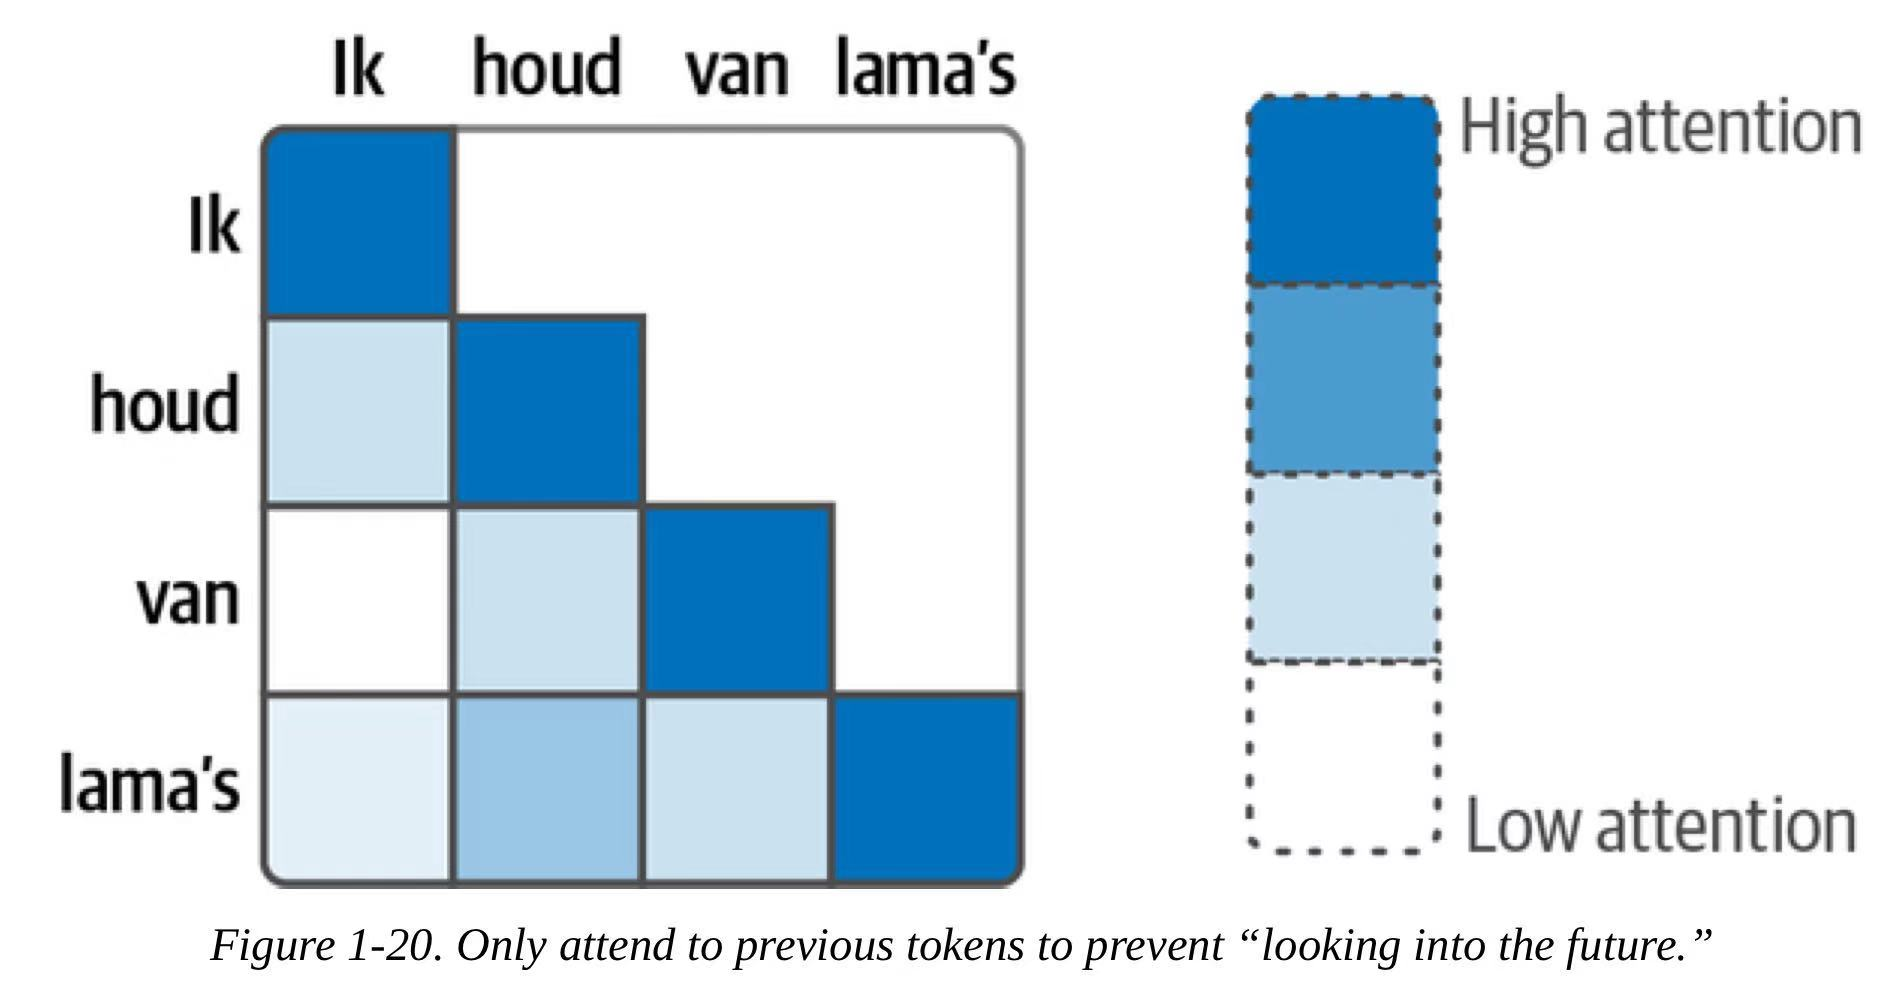

这些构建模块共同构成了Transformer架构，并成为语言人工智能中许多有影响力的模型的基础（如将要介绍的BERT和GPT-1）。

### 表示模型：仅编码器模型

2018年，一种名为“基于Transformer的双向编码器表示（BERT）”的新架构被提出，它可以用于多种任务，并在未来几年中成为语言人工智能的基础。BERT是一种仅编码器的架构，专注于表示语言。

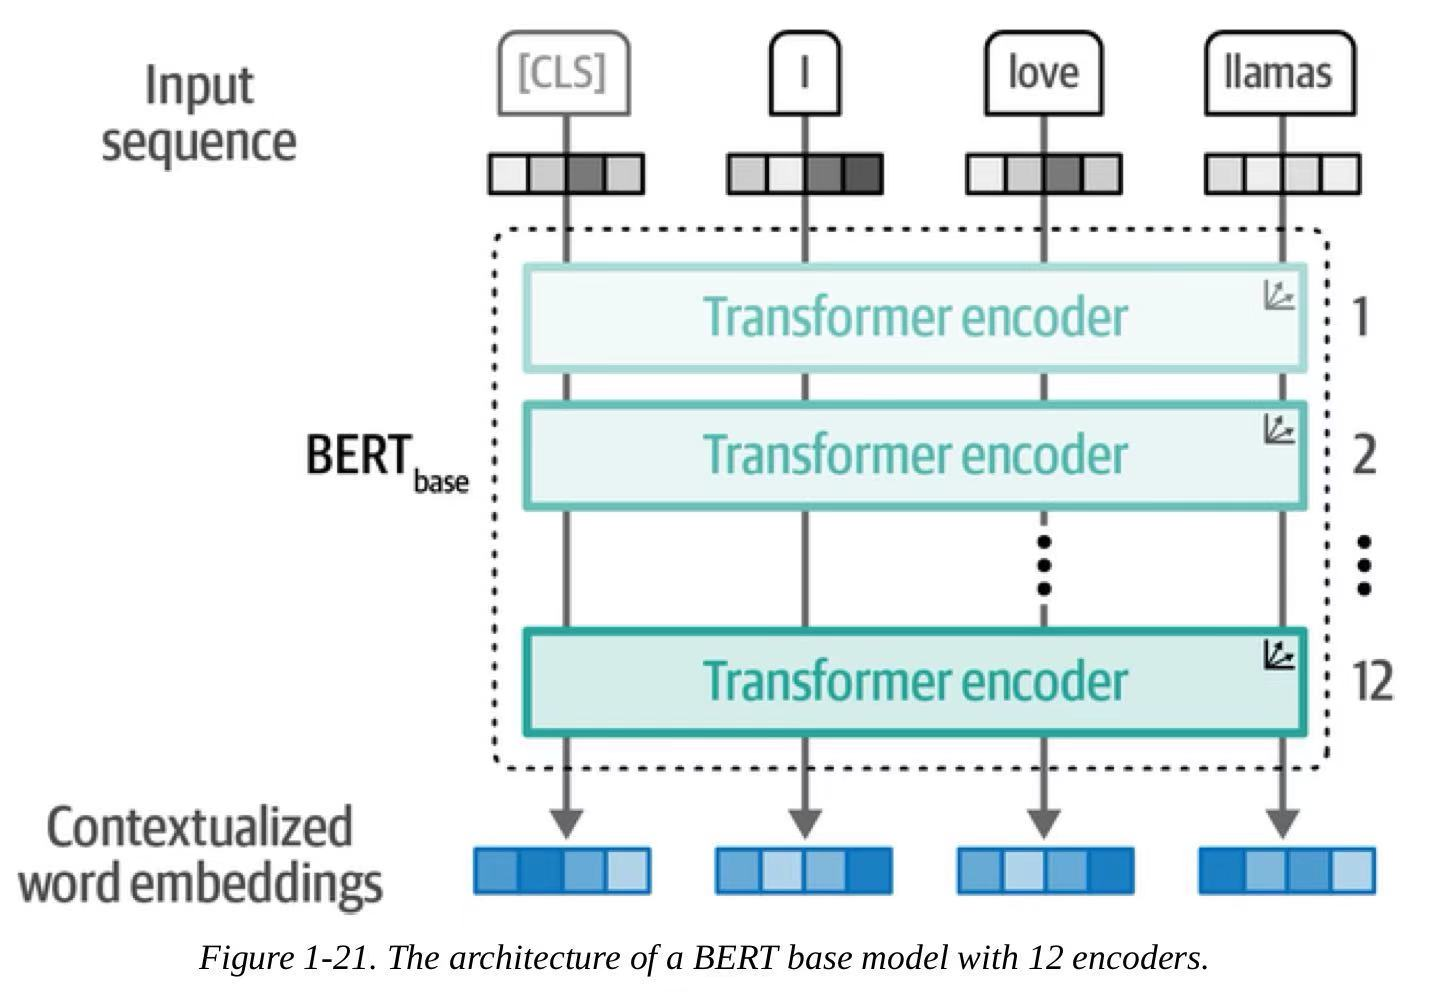

我们将此[CLS]标记用作在特定任务（如分类）上对模型进行微调时的输入嵌入。

训练这些编码器堆叠可能是一项艰巨的任务，BERT通过采用一种称为掩码语言建模的技术来解决这个问题。这种方法会对输入的一部分进行掩码，以便模型进行预测。这项预测任务虽然困难，但能够使BERT创建出更准确的输入（中间）表示。

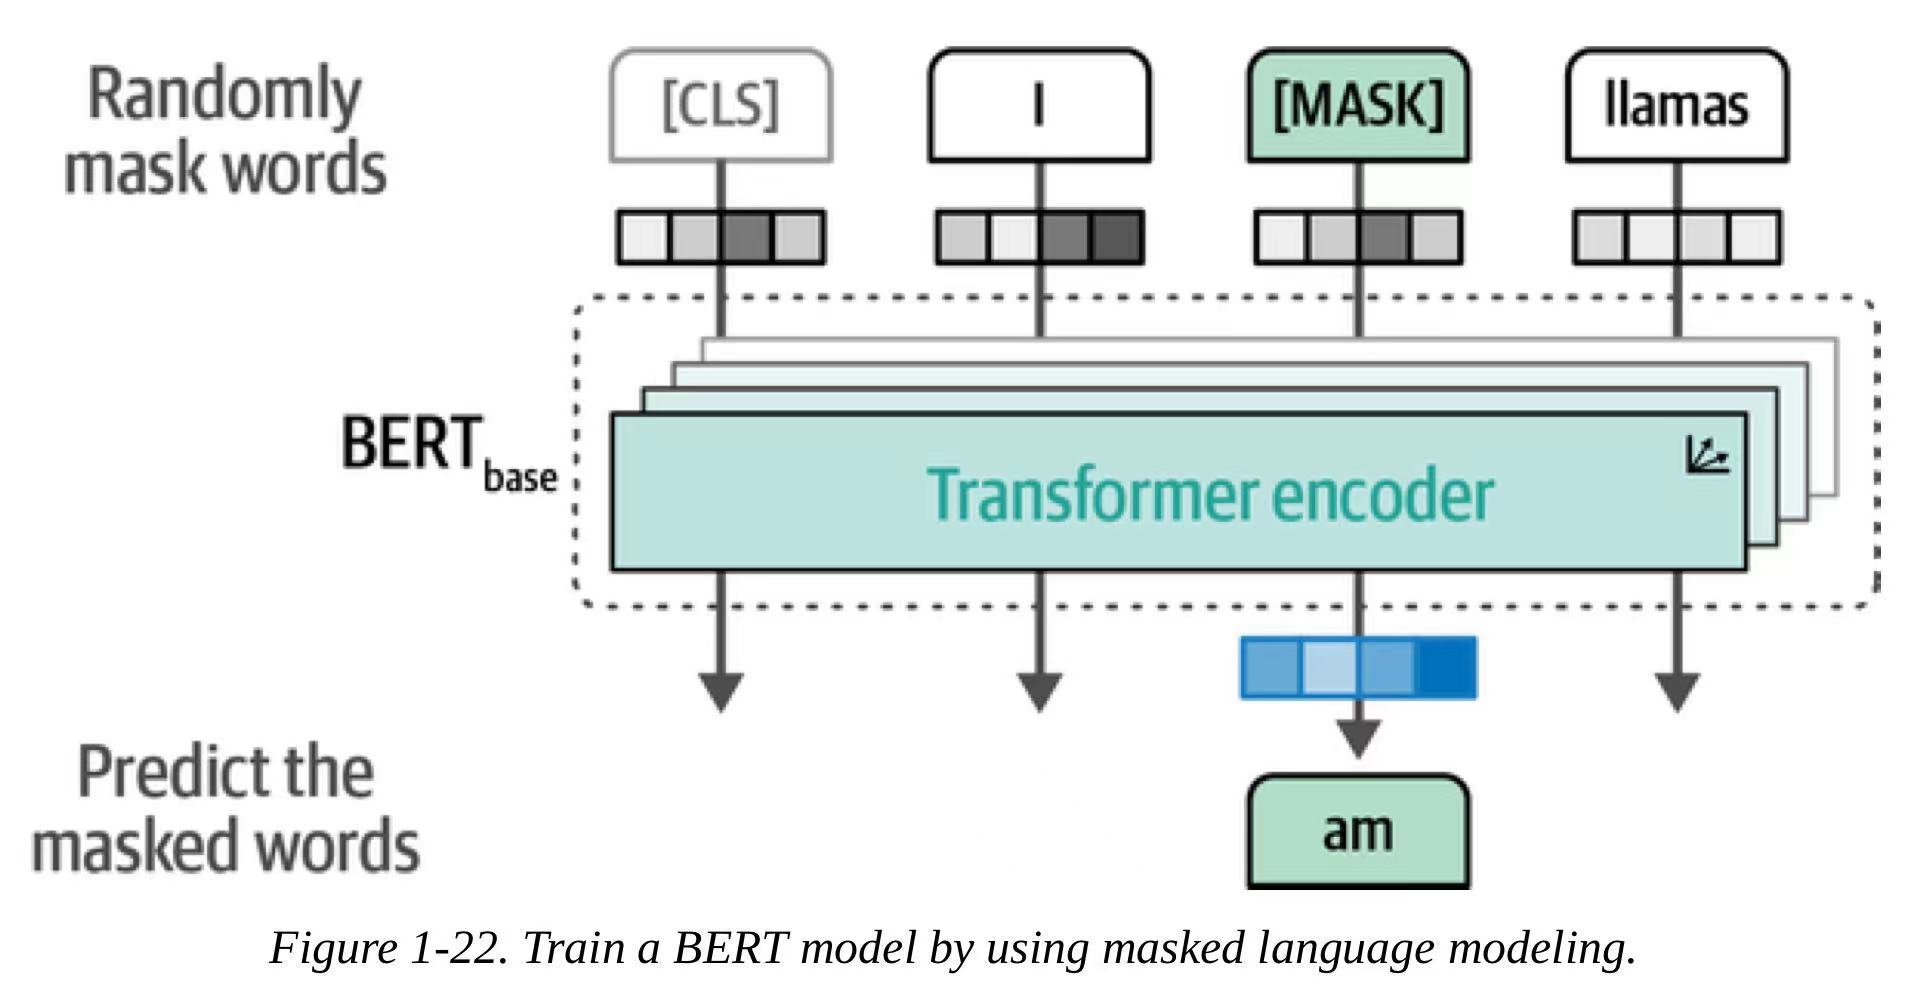

这种架构和训练过程使得BERT及相关架构在表示上下文语言方面表现出色。

BERT类模型通常用于迁移学习，这包括首先对其进行语言建模的预训练，然后针对特定任务进行微调。

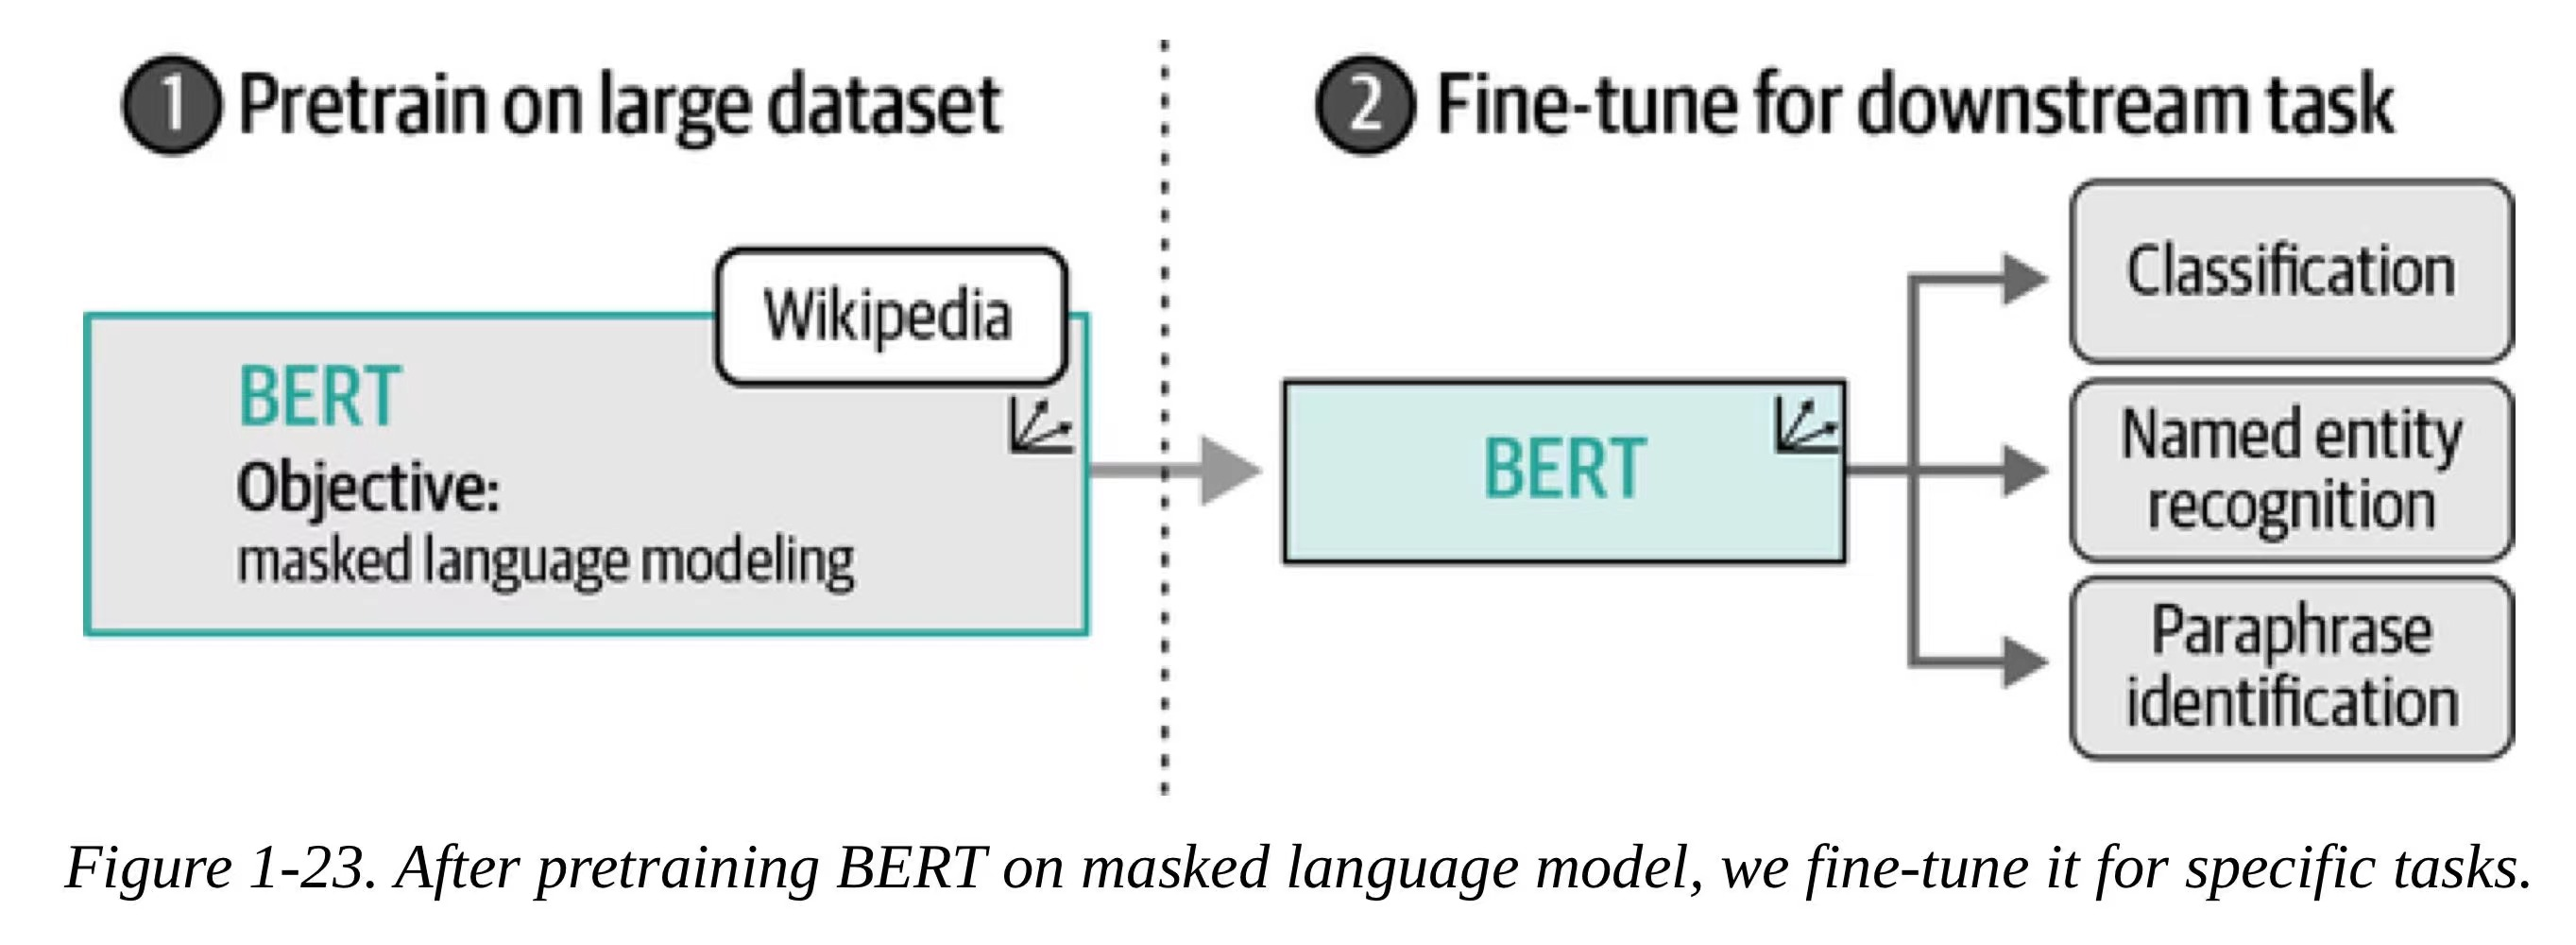

预训练模型的一个巨大优势是，大部分训练工作已经为我们完成。针对特定任务的微调通常计算量较小，所需数据也较少。

此外，BERT类模型在其架构的几乎每个步骤中都会生成嵌入。这也使得BERT模型成为特征提取机器，而无需针对特定任务进行微调。（！！！又没看懂）

在本书中，我们将仅编码器的模型称为表示模型（representation models），以区别于仅解码器的模型，我们将后者称为生成模型（generative models）。在大多数图像中也会显示表示模型和生成模型及其组件之间的区别。

### 生成模型：仅解码器模型

与BERT的仅编码器架构类似，2018年提出了仅解码器架构，旨在处理生成任务。由于其生成能力，该架构被称为生成式预训练Transformer（Generative Pre-trained Transformer，GPT），现为区分后续版本而被称为GPT-1。

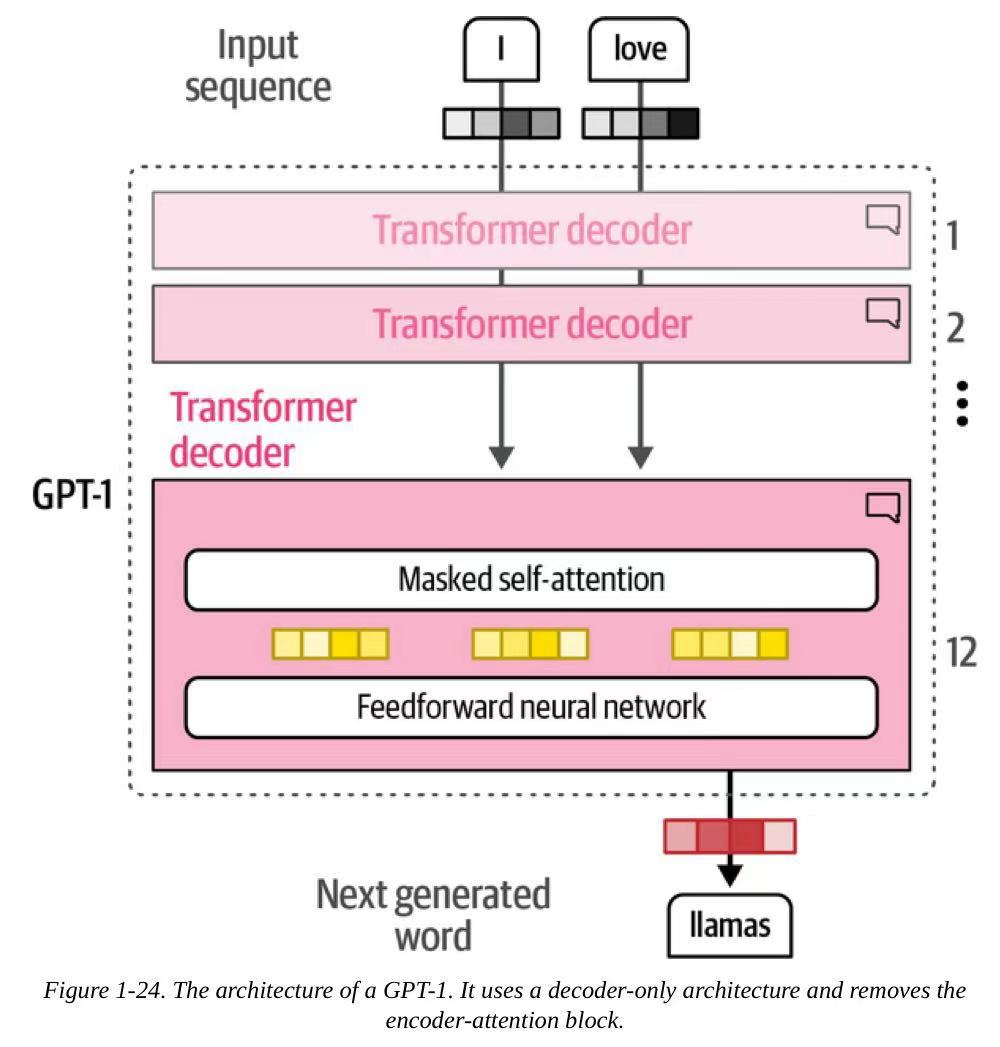

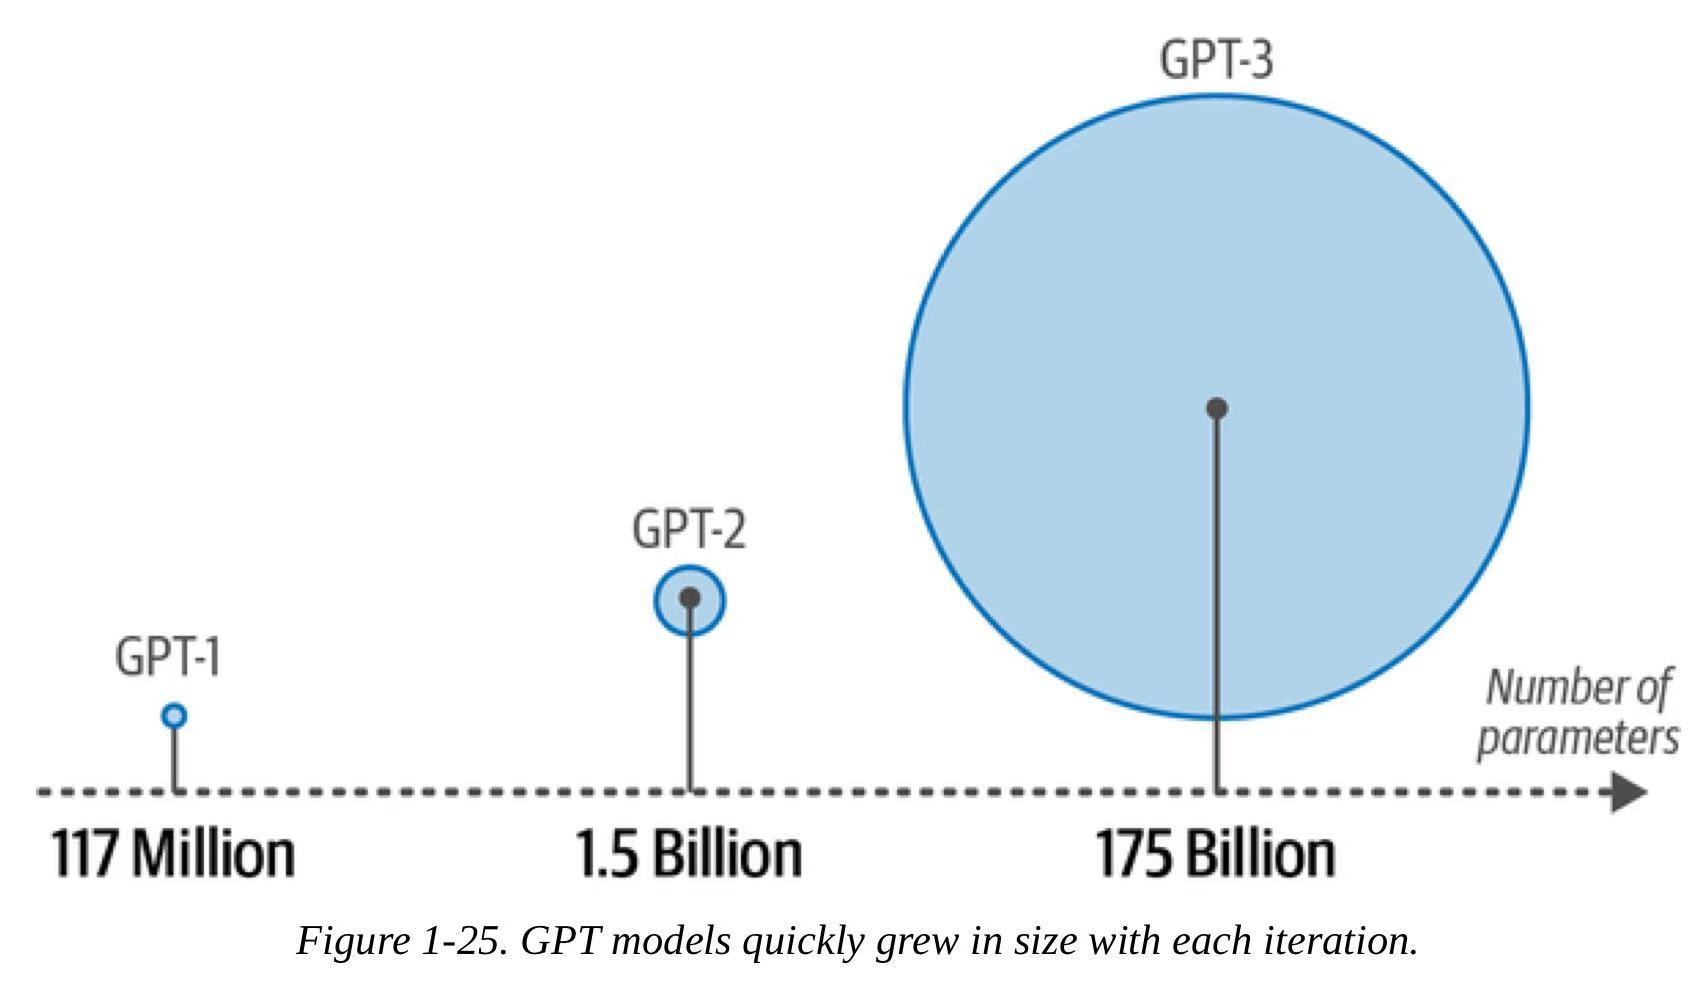

这些生成式的仅解码器模型，尤其是“更大”的模型，通常被称为大语言模型（LLMs）。但是LLM这一术语不仅适用于生成式模型（仅解码器），也适用于表示模型（仅编码器）。

通过对这些模型进行微调，我们可以创建能够遵循指令的指令式或聊天式模型。

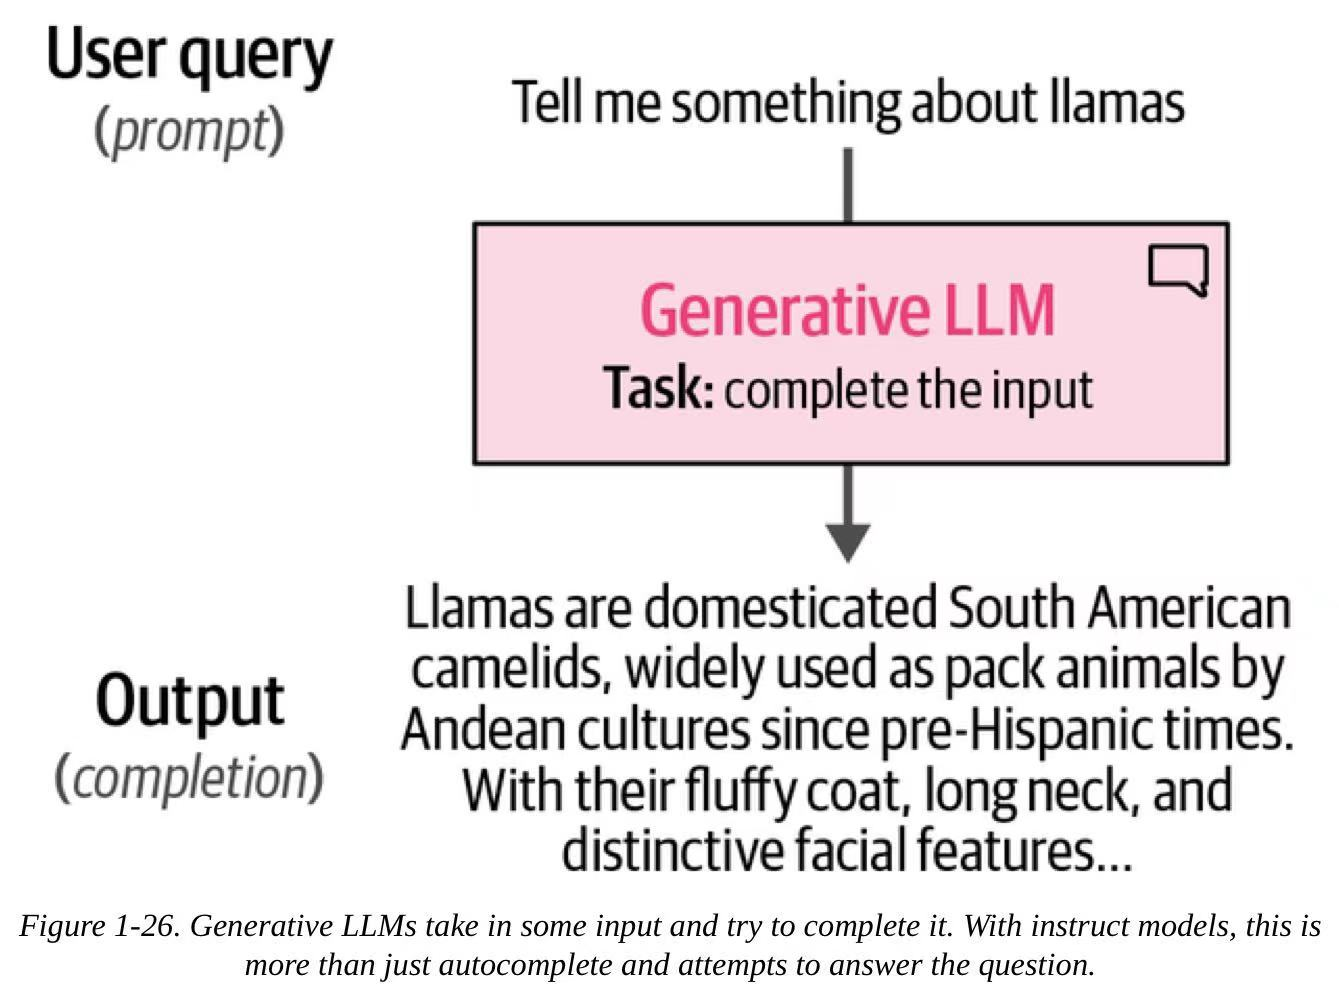

这些完成式模型的一个重要部分是所谓的上下文长度或上下文窗口。上下文长度表示模型可以处理的最大标记数量，但由于这些模型的自回归特性，随着新标记的生成，当前的上下文长度会增加。

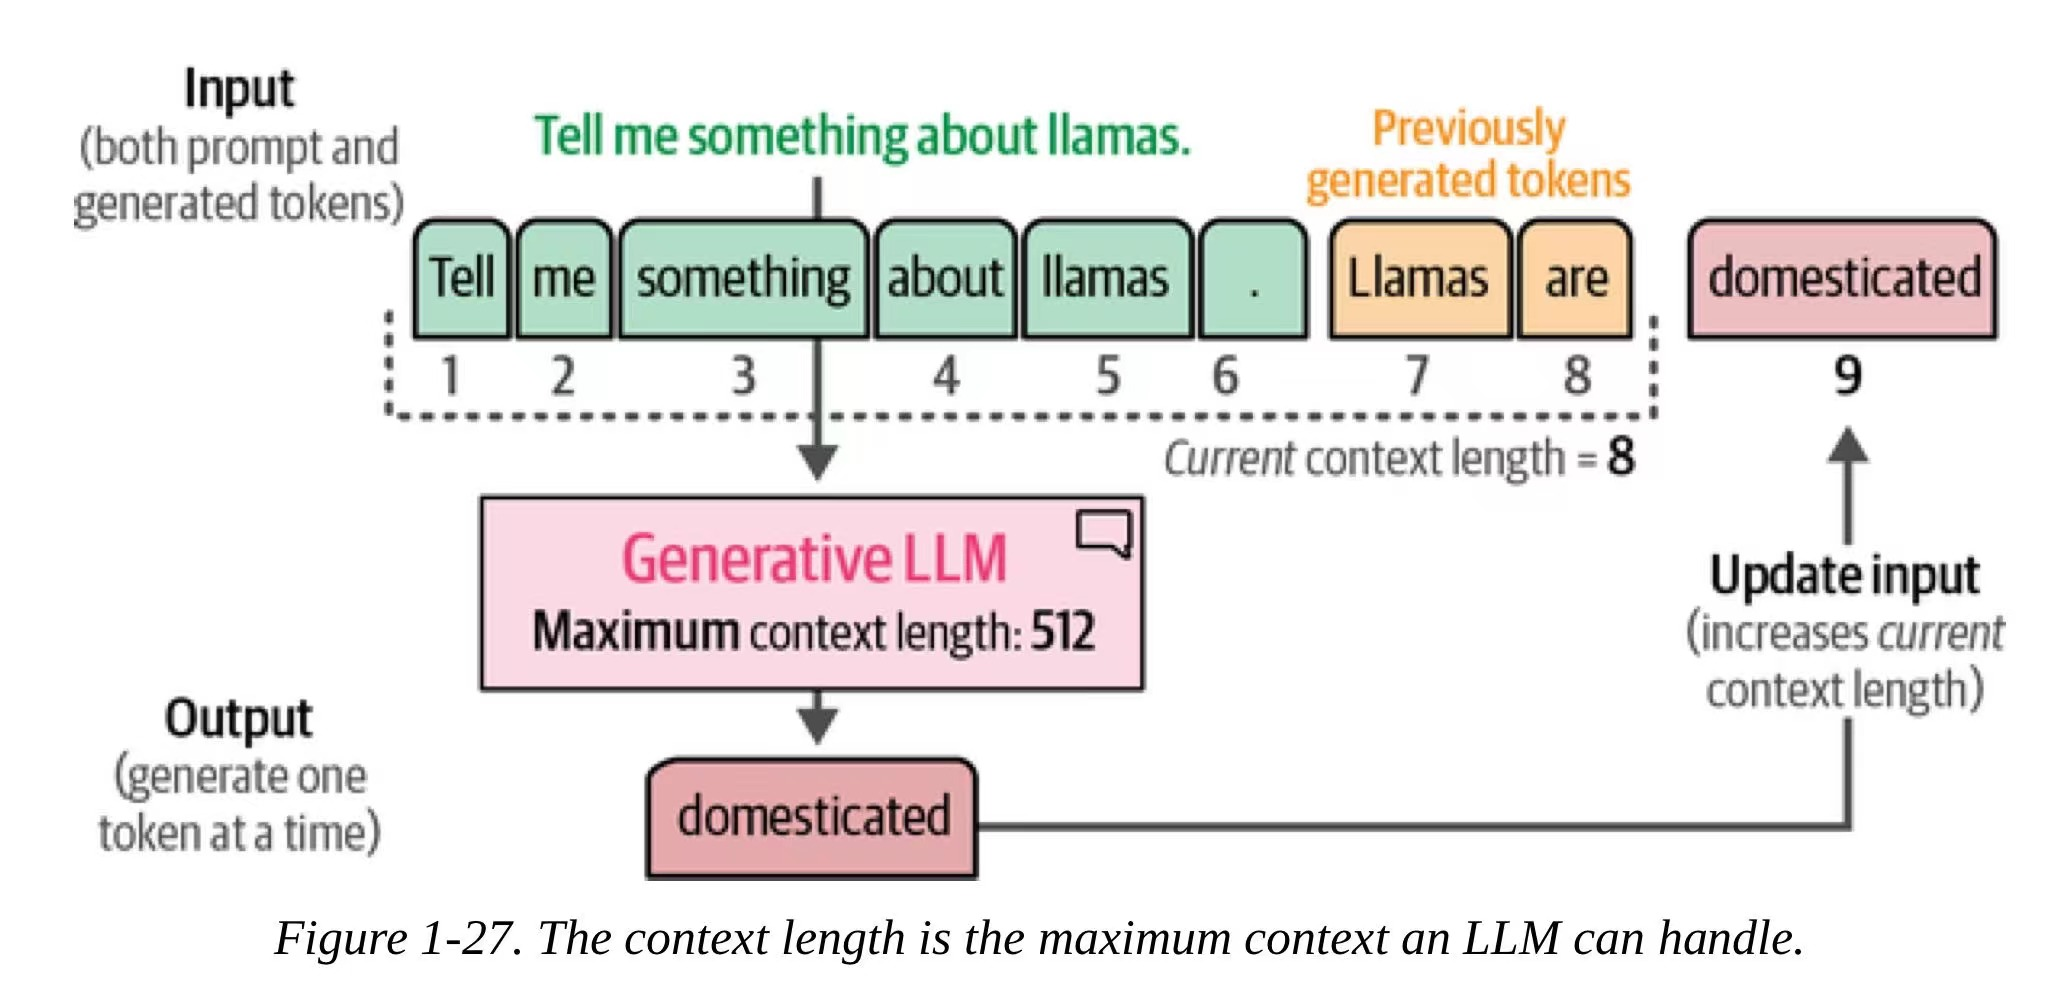

### 生成式AI之年

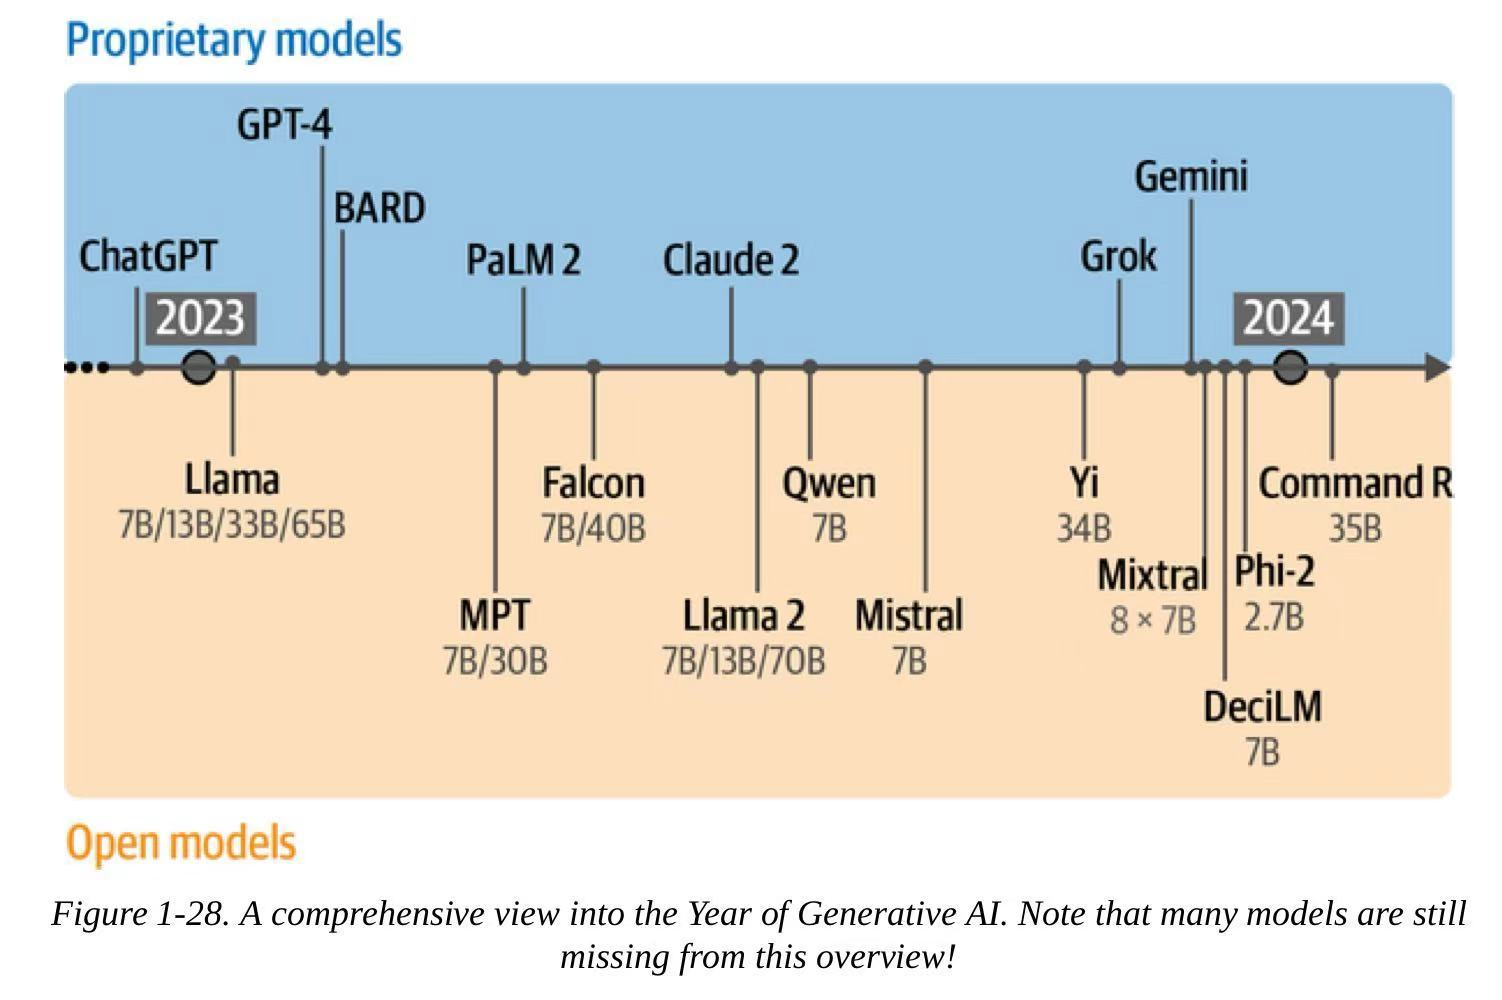

## “大语言模型”的动态定义

“大语言模型”也包括那些不生成文本且可以在消费者硬件上运行的模型。因此，除了涵盖生成式模型外，本书还将介绍参数少于10亿的、不生成文本的模型；也将探讨如何使用其他模型（如嵌入模型、表示模型，甚至词袋模型）来增强大型语言模型（LLMs）的能力。

## 大语言模型的训练范式

传统机器学习通常涉及为特定任务训练一个模型，这是一个一步到位的过程。

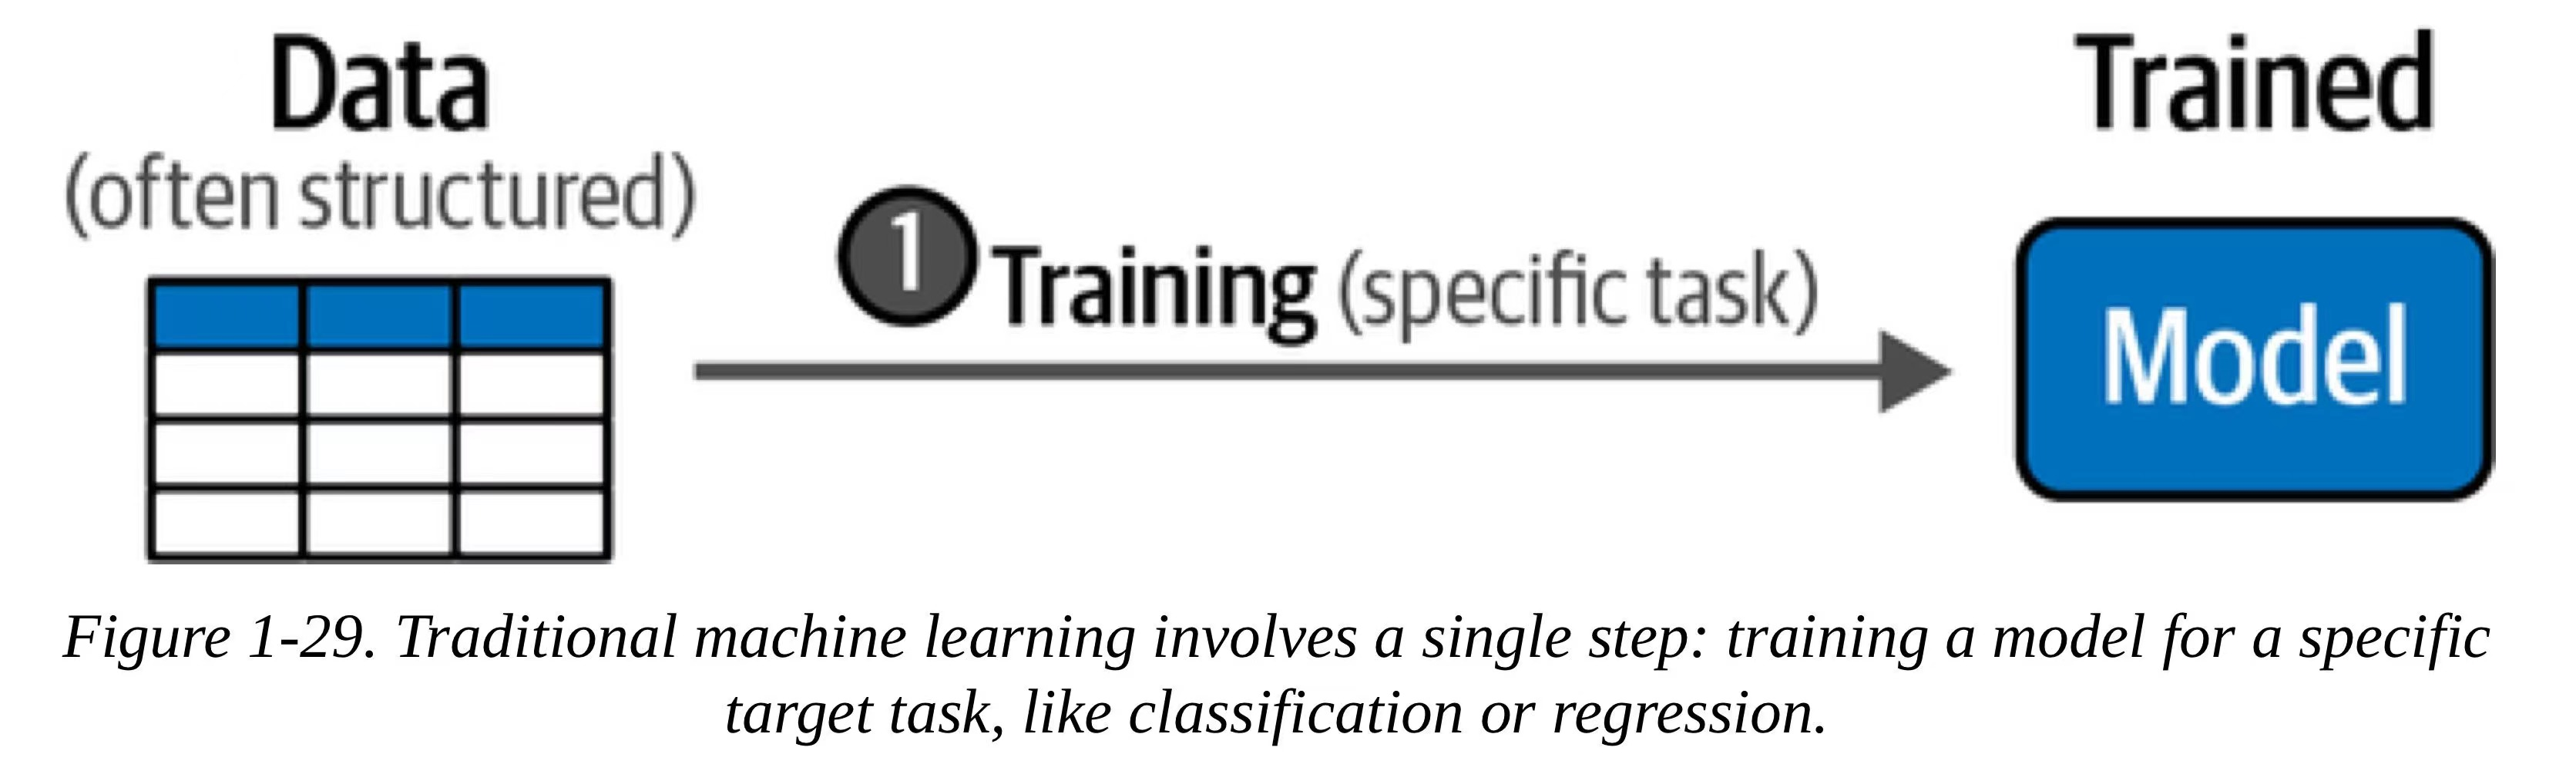

相比之下，创建大语言模型（LLMs）通常至少包含两个步骤：

### 语言建模

第一步是预训练，它占据了大部分的计算和训练时间。

大语言模型（LLM）会在庞大的互联网文本语料库上进行训练，从而使模型学习语法、上下文和语言模式。这一广泛的训练阶段尚未针对预测下一个词以外的特定任务或应用进行定向。由此产生的模型通常被称为基础模型或基模型。这些模型通常不会遵循指令。

### 微调

第二步是微调（有时也称为后训练），涉及使用先前训练好的模型，并针对更具体的任务进行进一步训练。

这可以使大语言模型（LLM）适应特定任务或表现出所需的行为。这种方法节省了大量资源，因为预训练阶段成本高昂，通常所需的数据和计算资源是大多数人和组织所无法企及的。

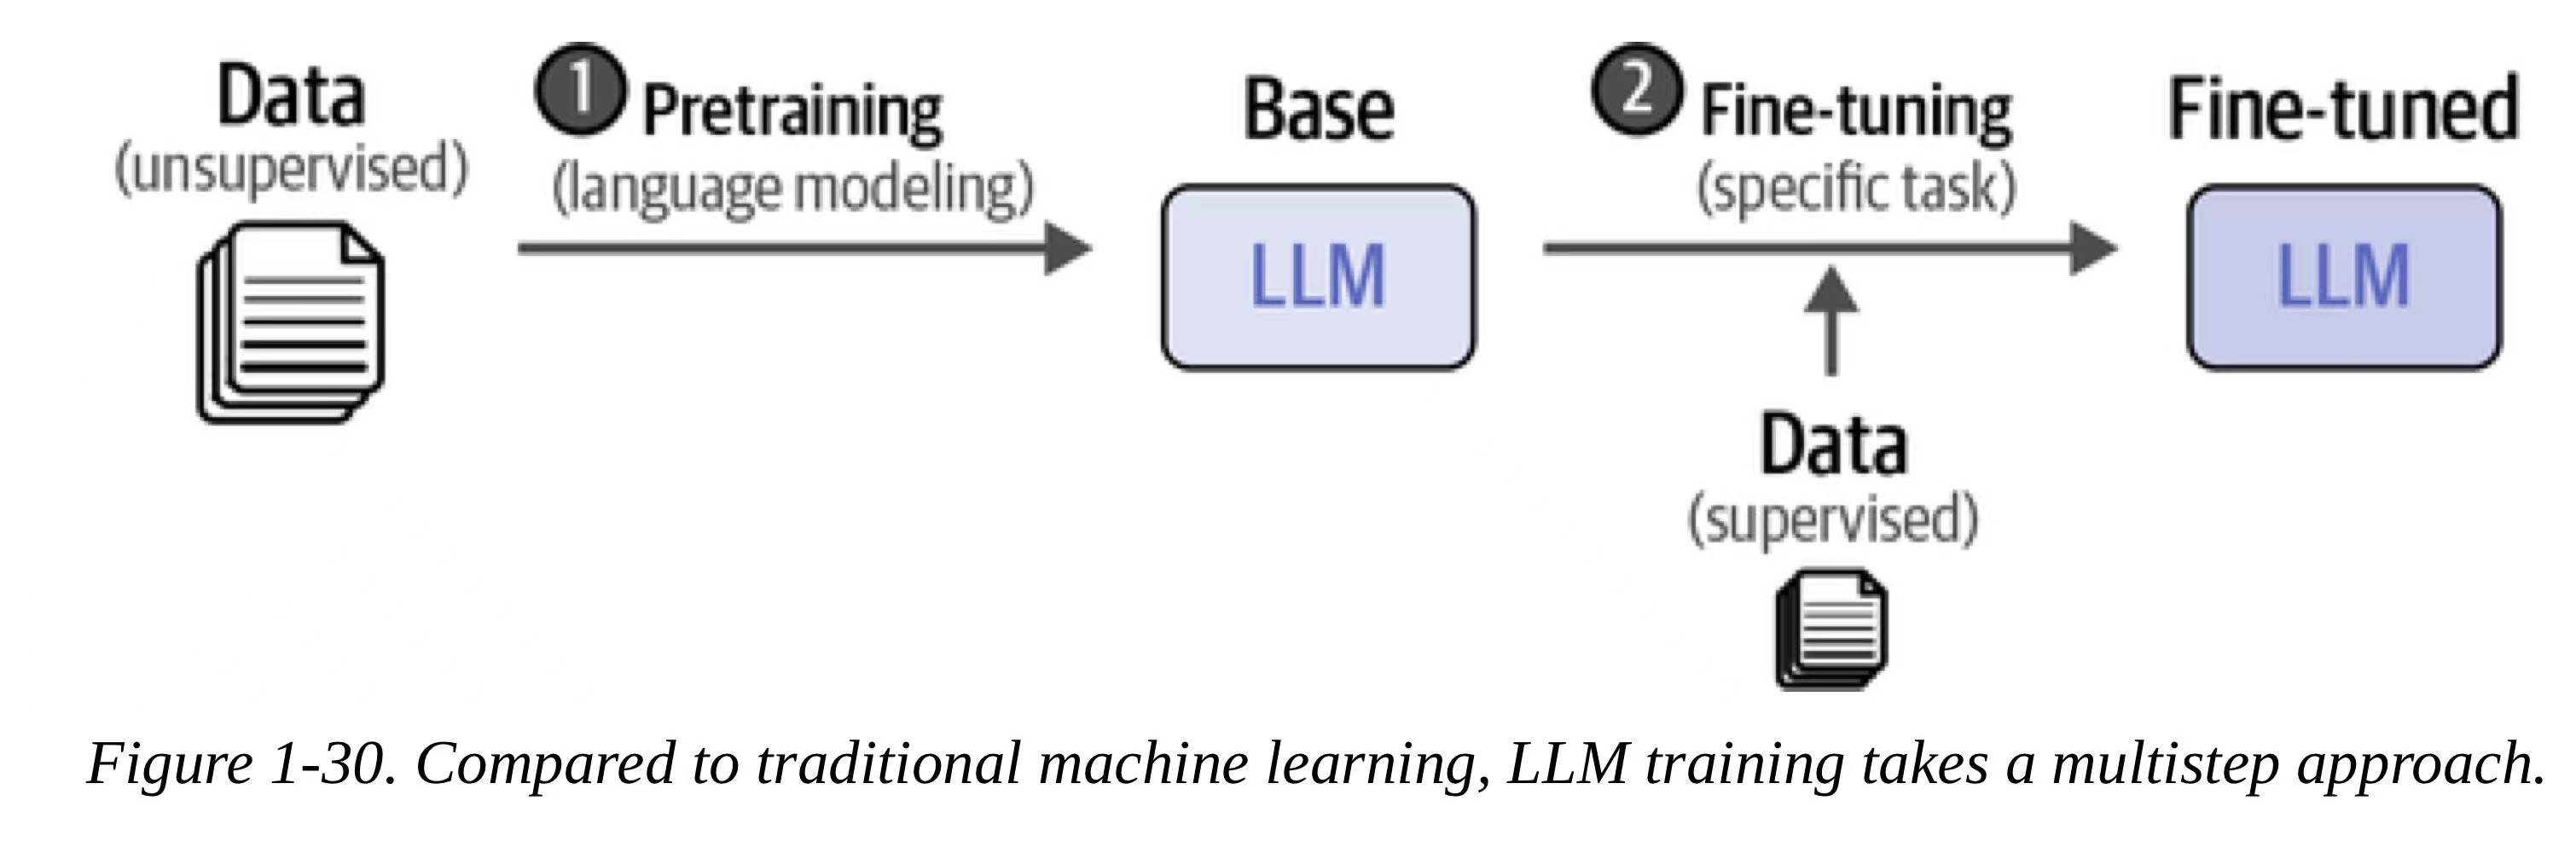

## 大型语言模型应用：它们为何如此有用？

大语言模型（LLMs）的特性使它们适用于广泛的任务，让我们探索一些常见的任务和技术：

#### 检测客户留下的评论是正面还是负面

这是（监督）分类任务，可以使用仅编码器或仅解码器的模型来处理，既可以使用预训练模型（第4章），也可以通过微调模型（第11章）来处理。

#### 开发一个用于查找工单问题中共同主题的系统

这是（无监督）分类，因为我们没有预定义的标签。我们可以利用仅编码器的模型来执行分类本身，而利用仅解码器的模型来为话题打标签（第5章）。

#### 构建一个用于检索和检查相关文档的系统

语言模型系统的一个重要组成部分是它们能够添加外部信息资源。利用语义搜索，我们可以构建系统，使我们能够轻松访问和查找大语言模型（LLM）所需的信息（第8章）。通过创建或微调自定义嵌入模型，可以提升您的系统（第12章）。

#### 构建一个能够利用外部资源（如工具和文档）的大语言模型（LLM）聊天机器人

这是多种技术的结合，展示了如何通过添加额外的组件来发掘大语言模型（LLMs）的真正潜力。诸如提示工程（第6章）、检索增强生成（第8章）和微调大语言模型（第12章）等方法，都是构建大语言模型这一复杂系统的重要组成部分。

#### 构建一个能够根据冰箱中物品的照片来编写食谱的大语言模型（LLM）

这是一个多模态任务，其中大语言模型（LLM）接收一张图片，并根据它所看到的内容进行推理（第9章）。大语言模型正在被应用于其他模态，如视觉，这开辟了各种有趣的应用场景。

## 大语言模型（LLM）的负责任开发与使用

#### 偏见与公平性

#### 透明度和问责制

#### 生成有害内容

#### 知识产权

#### 法规

## 生成你的第一段文本

让我们开始吧！当您使用大型语言模型（LLM）时，会加载两个模型：

生成模型本身

其底层的分词器

In [6]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torch

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
print("hello")

hello


In [7]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

In [8]:
!pip install -U huggingface_hub

In [9]:
import torch

In [13]:
!pip install accelerate  flash_attn

  Using cached flash_attn-2.6.3.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.2.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.1.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.0.post1.tar.gz (2.6 MB)
  Using cached flash_attn-2.5.9.post1.tar.gz (2.6 MB)
  Using cached flash_attn-2.5.8.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.7.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.6.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.5.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.4.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.3.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.2.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.1.post1.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.0.tar.gz (2.5 MB)
  Using cached flash_attn-2.4.3.post1.tar.gz (2.5 MB)
  Using cached flash_attn-2.4.2.tar.gz (2.4 MB)
  Using cached flash_attn-2.4.1.tar.gz (2.4 MB)
  Using cached flash_attn-2.4.0.post1.tar.gz (2.4 MB)
  Using cached flash_attn-2.3.6.tar.gz (2.3 MB)
  Using cached flash_attn-2.3.5.tar.gz (2.3 MB)
  Using ca

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-ojk55n7f\\flash-attn_32bb4fdac4464fa2ab5891e27f61c09b\\setup.py'"'"'; __file__='"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-ojk55n7f\\flash-attn_32bb4fdac4464fa2ab5891e27f61c09b\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\HUAWEI\AppData\Local\Temp\pip-pip-egg-info-xdrune9e'
         cwd: C:\Users\HUAWEI\AppData\Local\Temp\pip-install-ojk55n7f\flash-attn_32bb4fdac4464fa2ab5891e27f61c09b\
    Complete output (11 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-ojk55n7f\flash-attn_32bb4fdac4464fa2ab5891e27f61c09b\setup.py"

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-c6eidx72\\flash-attn_460c1312dc674712b1251650eb286ceb\\setup.py'"'"'; __file__='"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-c6eidx72\\flash-attn_460c1312dc674712b1251650eb286ceb\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\HUAWEI\AppData\Local\Temp\pip-pip-egg-info-0w8dlx8m'
         cwd: C:\Users\HUAWEI\AppData\Local\Temp\pip-install-c6eidx72\flash-attn_460c1312dc674712b1251650eb286ceb\
    Complete output (11 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-c6eidx72\flash-attn_460c1312dc674712b1251650eb286ceb\setup.py"

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached flash_attn-2.0.0.post1.tar.gz (2.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached flash_attn-2.6.3.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.2.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.1.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.0.post1.tar.gz (2.

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-3kxsi_22\\flash-attn_bf66ec3fc463419eb2e2727e051ad64b\\setup.py'"'"'; __file__='"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-3kxsi_22\\flash-attn_bf66ec3fc463419eb2e2727e051ad64b\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\HUAWEI\AppData\Local\Temp\pip-pip-egg-info-05rs8kf9'
         cwd: C:\Users\HUAWEI\AppData\Local\Temp\pip-install-3kxsi_22\flash-attn_bf66ec3fc463419eb2e2727e051ad64b\
    Complete output (11 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-3kxsi_22\flash-attn_bf66ec3fc463419eb2e2727e051ad64b\setup.py"

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Using cached https://mirrors.aliyun.com/pypi/packages/cd/1e/21321670cd3c2f225026d9fd89272cae661529238850e79f48ccf2f9e4e3/flash_attn-2.6.3.tar.gz (2.6 MB)
  Using cached https://mirrors.aliyun.com/pypi/packages/b0/b2/09c651d7980a68f1dd55d6180d99b0605957911cca0c305f10b3fb72a36b/flash_attn-2.6.2.tar.gz (2.6 MB)
  Using cached https://mirrors.aliyun.com/pypi/packages/d2/bb/9d159e09a8ea838cb8128963000efcb31e90dba0951083d3eca099d3b2d7/flash_attn-2.6.1.tar.gz (2.6 MB)
  Using cached https://mirrors.aliyun.com/pypi/packages/67/e6/064aadb58fbcd5fc6281809ec75f32abc38b2fd9152ae7e40557f0f8a199/flash_attn-2.6.0.post1.tar.gz (2.6 MB)
  Using cached https://mirrors.aliyun.com/pypi/packages/14/cd/53cbd9bd45e9bf1002f0c4de488e549501d085f4318c906807a0e50164cd/flash_attn-2.5.9.post1.tar.gz (2.6 MB)
  Using cached https://mirrors.aliyun.com/pypi/packages/72/94/06f618bb338ec7203b48ac542e73087362b7750f9c568b13d213a3f181bb/flash_attn-2.5.8.tar.gz (

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-47a78ky9\\flash-attn_bbf2837eedf04825b6d9b806d3e3afee\\setup.py'"'"'; __file__='"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-47a78ky9\\flash-attn_bbf2837eedf04825b6d9b806d3e3afee\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\HUAWEI\AppData\Local\Temp\pip-pip-egg-info-zpcu_3qy'
         cwd: C:\Users\HUAWEI\AppData\Local\Temp\pip-install-47a78ky9\flash-attn_bbf2837eedf04825b6d9b806d3e3afee\
    Complete output (11 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-47a78ky9\flash-attn_bbf2837eedf04825b6d9b806d3e3afee\setup.py"

      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-47a78ky9\flash-attn_0d099c7a1cdc42bbad2c64a460657197\setup.py", line 97, in <module>
        subprocess.run(["git", "submodule", "update", "--init", "csrc/cutlass"])
      File "D:\anaconda\lib\subprocess.py", line 493, in run
        with Popen(*popenargs, **kwargs) as process:
      File "D:\anaconda\lib\subprocess.py", line 858, in __init__
        self._execute_child(args, executable, preexec_fn, close_fds,
      File "D:\anaconda\lib\subprocess.py", line 1311, in _execute_child
        hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
    FileNotFoundError: [WinError 2] 系统找不到指定的文件。
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-47a78ky9\\flash-attn_7242bd3b4d3040f7ada035180b677

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-6r5tglej\\flash-attn_5b97edf9b39d40f5b535eebc45825e3f\\setup.py'"'"'; __file__='"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-6r5tglej\\flash-attn_5b97edf9b39d40f5b535eebc45825e3f\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\HUAWEI\AppData\Local\Temp\pip-pip-egg-info-72103_mw'
         cwd: C:\Users\HUAWEI\AppData\Local\Temp\pip-install-6r5tglej\flash-attn_5b97edf9b39d40f5b535eebc45825e3f\
    Complete output (11 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-6r5tglej\flash-attn_5b97edf9b39d40f5b535eebc45825e3f\setup.py"

  Using cached flash_attn-2.6.3.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.2.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.1.tar.gz (2.6 MB)
  Using cached flash_attn-2.6.0.post1.tar.gz (2.6 MB)
  Using cached flash_attn-2.5.9.post1.tar.gz (2.6 MB)
  Using cached flash_attn-2.5.8.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.7.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.6.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.5.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.4.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.3.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.2.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.1.post1.tar.gz (2.5 MB)
  Using cached flash_attn-2.5.0.tar.gz (2.5 MB)
  Using cached flash_attn-2.4.3.post1.tar.gz (2.5 MB)
  Using cached flash_attn-2.4.2.tar.gz (2.4 MB)
  Using cached flash_attn-2.4.1.tar.gz (2.4 MB)
  Using cached flash_attn-2.4.0.post1.tar.gz (2.4 MB)
  Using cached flash_attn-2.3.6.tar.gz (2.3 MB)
  Using cached flash_attn-2.3.5.tar.gz (2.3 MB)
  Using ca

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-7bicqv1_\\flash-attn_f8b6dc25cdc44987ad49d00e1fcac68e\\setup.py'"'"'; __file__='"'"'C:\\Users\\HUAWEI\\AppData\\Local\\Temp\\pip-install-7bicqv1_\\flash-attn_f8b6dc25cdc44987ad49d00e1fcac68e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\HUAWEI\AppData\Local\Temp\pip-pip-egg-info-5vhdudb7'
         cwd: C:\Users\HUAWEI\AppData\Local\Temp\pip-install-7bicqv1_\flash-attn_f8b6dc25cdc44987ad49d00e1fcac68e\
    Complete output (11 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\HUAWEI\AppData\Local\Temp\pip-install-7bicqv1_\flash-attn_f8b6dc25cdc44987ad49d00e1fcac68e\setup.py"

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# 加载模型和分词器
model = AutoModelForCausalLM.from_pretrained(
    "D:\研究生\大语言模型\Phi-3",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("D:\研究生\大语言模型\Phi-3")
print(tokenizer)

In [ ]:
torch.cuda.is_available()

In [ ]:
from transformers import pipeline

# 创建管道
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=500,
    do_sample=False
)

#### return_full_text

如果将此设置为False，则不会返回提示，而只会返回模型的输出。

#### max_new_tokens

模型将生成的最大标记数量。通过设置限制，我们可以防止输出过长和难以处理，因为一些模型可能会继续生成输出，直到达到其上下文窗口。

#### do_sample

模型是否使用采样策略来选择下一个标记。如果将此设置为False，则模型将始终选择下一个最可能的标记。在第六章中，我们将探讨几种采样参数，这些参数可以在模型的输出中激发一些创造性。

In [ ]:
# 提示（用户输入/查询）
messages = [
    {"role": "user", "content": "Create a funny joke about chickens."}
]

# 生成输出
output = generator(messages)
print(output[0]["generated_text"])

## 总结

在这本书的第一章中，我们深入探讨了大语言模型（LLMs）对语言人工智能领域产生的革命性影响。它极大地改变了我们处理翻译、分类、摘要等任务的方法。通过回顾语言人工智能的近期历史，我们探索了几种类型的大语言模型的基本原理，从简单的词袋表示到使用神经网络进行更复杂的表示。

我们讨论了注意力机制，这是模型内部编码上下文的一步，也是使大语言模型如此强大的关键因素。我们简要介绍了使用这种神奇机制的两大类模型：表示模型（仅编码器），如BERT，和生成模型（仅解码器），如GPT系列模型。在本书中，这两类模型都被视为大语言模型。

总体而言，本章概述了语言人工智能的现状，包括其应用、社会影响和伦理问题，以及运行此类模型所需的资源。最后，我们使用Phi-3模型生成了我们的第一段文本，该模型将在整本书中使用。

在接下来的两章中，您将了解一些基础过程。第二章，我们将从探讨分词和嵌入开始，这是语言人工智能领域中两个经常被低估但至关重要的组成部分。第三章将深入探讨语言模型，您将发现用于生成文本的精确方法。